# Library Python

In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re

Library Visualiasi

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from IPython.display import display

#Library Pemrosesan Bahasa

In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.8 MB/s eta 0:00:00


#Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Analisis Sentimen 2/crawling_tweet/dataset_ruutni_10k.xlsx')

In [ ]:
data.head(5)

conversation_id_str                      created_at  favorite_count  \
0  1902491388824163072  Sun Mar 16 20:59:58 +0000 2025               0   
1  1901809206979875072  Sun Mar 16 20:59:54 +0000 2025               0   
2  1902510358453240064  Sun Mar 16 20:59:51 +0000 2025               0   
3  1901382687727972096  Sun Mar 16 21:18:53 +0000 2025               0   
4  1901383073482392064  Sun Mar 16 21:20:25 +0000 2025               0   

                                           full_text               id_str  \
0     @barengwarga Indonesia makin gila #TolakRUUTNI  1902510390946491904   
1  @jackjackparrr gilaa udah cepet aja menuju gel...  1902510374592901120   
2  Buat kalian semua yang turun ke jalan tetap ha...  1902510358453240064   
3  Hampir pada kesimpulan tidak ada satupun parta...  1901382687727972096   
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...  1901383073482392064   

                                         image_url in_reply_to_screen_name  \
0                                              NaN             barengwarga   
1                                              NaN           jackjackparrr   
2                                              NaN                     NaN   
3  https://pbs.twimg.com/media/GmMReaPaMAAtUi8.jpg                     NaN   
4  https://pbs.twimg.com/media/GmMR00uagAEzO1g.jpg                     NaN   

  lang location  quote_count  reply_count  retweet_count  \
0   in      NaN            0            0              0   
1   in      NaN            0            0              0   
2   in      NaN            0            0              0   
3   in      NaN            0            0              0   
4   in      NaN            0            0              0   

                                           tweet_url          user_id_str  \
0  https://x.com/westernblueee/status/19025103909...  1768622079317020928   
1  https://x.com/jay865849/status/190251037459290...  1777549974634704896   
2  https://x.com/aestehsweet/status/1902510358453...  1420421510691315968   
3  https://x.com/petruspasaribuu/status/190138268...  1301846773976104960   
4  https://x.com/dengkot_djobros/status/190138307...  1744188579121975040   

          username  
0    westernblueee  
1        jay865849  
2      aestehsweet  
3  petruspasaribuu  
4  dengkot_djobros

#Data Karakteristik

- `conversation_id_str`
Tipe Data: int64
Deskripsi: Identifikasi unik untuk setiap percakapan atau thread dalam konteks media sosial atau platform diskusi. Ini adalah angka integer yang bertindak sebagai primary key untuk mengidentifikasi percakapan secara unik.
- `created_at`
Tipe Data: datetime64[ns, UTC]
Deskripsi: Timestamp yang menunjukkan waktu pembuatan entri atau tweet. Waktu disimpan dalam UTC (Coordinated Universal Time) dengan presisi nanosekon.
- `favorite_count`
Tipe Data: int64
Deskripsi: Jumlah favorit atau 'likes' yang diterima entri atau tweet. Ini adalah indikator popularitas atau penerimaan positif dari konten.
- `full_text`
Tipe Data: object (biasanya string)
Deskripsi: Teks lengkap dari entri atau tweet. Ini bisa berisi teks yang dikirim oleh pengguna atau teks dari sebuah artikel atau postingan.
- `id_str`
Tipe Data: int64
Deskripsi: ID unik untuk entri atau tweet, serupa dengan conversation_id_str tetapi spesifik untuk setiap postingan atau tweet.
- `image_url`
Tipe Data: object (string)
Deskripsi: URL gambar yang terkait dengan tweet atau postingan. Kolom ini hanya diisi jika ada gambar yang terkait.
- `in_reply_to_screen_name`
Tipe Data: object (string)
Deskripsi: Nama pengguna dari akun yang di-reply oleh tweet atau entri. Ini memberikan konteks percakapan.
- `lang`
Tipe Data: object (string)
Deskripsi: Kode bahasa dari teks entri atau tweet, misal 'en' untuk Inggris, 'fr' untuk Prancis, dll.
- `location`
Tipe Data: object (string)
Deskripsi: Lokasi geografis dari pengguna atau di mana tweet diposting. Bisa jadi tidak spesifik atau kosong.
- `quote_count`
Tipe Data: int64
Deskripsi: Jumlah kali entri atau tweet telah di-quote oleh pengguna lain.
- `reply_count`
Tipe Data: int64
Deskripsi: Jumlah balasan yang diterima tweet atau postingan.
- `retweet_count`
Tipe Data: int64
Deskripsi: Jumlah kali tweet atau entri telah di-retweet oleh pengguna lain.
- `tweet_url`
Tipe Data: object (string)
Deskripsi: URL permanen dari tweet atau entri, memungkinkan akses langsung ke konten tersebut.
- `user_id_str`
Tipe Data: int64
Deskripsi: ID numerik pengguna yang membuat entri atau tweet.
- `username`
Tipe Data: object (string)
Deskripsi: Nama pengguna dari individu atau entitas yang memposting tweet.
- `source_filename`
Tipe Data: object (string)
Deskripsi: Nama file sumber dari mana data diimpor, berguna untuk melacak asal data dalam kasus analisis multi-sumber.
- `date_day`
Tipe Data: int32
Deskripsi: Representasi hari dari tanggal created_at, diambil sebagai integer yang menunjukkan hari dalam bulan (1-31).
- `date_month`
Tipe Data: int32
Deskripsi: Representasi bulan dari tanggal created_at, diambil sebagai integer yang menunjukkan bulan dalam tahun (1-12).
- `date_year`
Tipe Data: int32
Deskripsi: Representasi tahun dari tanggal created_at, diambil sebagai integer yang menunjukkan tahun.
- `date`
Tipe Data: datetime64[ns]
Deskripsi: Kolom tanggal yang menunjukkan tanggal eksplisit tanpa informasi waktu, sering digunakan untuk analisis berbasis tanggal tanpa mempertimbangkan waktu spesifik.

In [ ]:
df = pd.DataFrame(data[['full_text']])
df.head(5)

full_text
0     @barengwarga Indonesia makin gila #TolakRUUTNI
1  @jackjackparrr gilaa udah cepet aja menuju gel...
2  Buat kalian semua yang turun ke jalan tetap ha...
3  Hampir pada kesimpulan tidak ada satupun parta...
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...

#Hapus Duplikat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  9827 non-null   object
dtypes: object(1)
memory usage: 76.9+ KB


In [ ]:
# Menghapus data yang duplikat berdasarkan kolom 'full_text', hanya menyisakan kemunculan pertama
df.drop_duplicates(subset = "full_text", keep = "first", inplace = True)

# Mencetak jumlah data yang masih terduplikasi setelah penghapusan
print("Jumlah duplikasi: ", df.duplicated().sum())

df.info()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
Index: 9522 entries, 0 to 9826
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  9522 non-null   object
dtypes: object(1)
memory usage: 148.8+ KB


In [ ]:
# Mengisi nilai kosong (NaN) pada kolom 'full_text' dengan string kosong ('')
df['full_text'] = df['full_text'].fillna('')

# Menggabungkan semua teks dalam kolom 'full_text' menjadi satu string besar
text = ''.join(df['full_text'].astype(str).tolist())

# Membuat set stopwords (kata-kata yang akan dihapus dari word cloud)
stopwords = set(STOPWORDS)

# Menambahkan beberapa kata tambahan yang sering muncul tetapi tidak terlalu informatif
stopwords.update(['https', 't', 'co', 'rt', 'yg', 'amp', '...',])

# Membuat objek WordCloud dengan parameter tertentu
worldcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

# Menghasilkan word cloud berdasarkan teks yang telah digabungkan
worldcloud.generate(text)

# Menampilkan word cloud menggunakan Matplotlib
plt.figure(figsize=(10, 5)) # Menentukan ukuran gambar
plt.imshow(worldcloud, interpolation="bilinear") # Menampilkan word cloud
plt.axis("off") # Menghilangkan sumbu koordinat
plt.show()  # Menampilkan gambar

In [ ]:
# Menggabungkan semua teks dalam kolom 'full_text' menjadi satu string besar
text = "".join(df["full_text"])

# Tokenisasi: Memisahkan teks menjadi kata-kata individual
tokens = text.split()

# Menghitung jumlah kemunculan setiap kata
word_counts = Counter(tokens)

# Mengambil 10 kata yang paling sering muncul beserta jumlah kemunculannya
top_words = word_counts.most_common(10)

# Memisahkan daftar kata dan jumlah kemunculannya untuk visualisasi
word, counts = zip(*top_words)

# Mengatur warna untuk setiap bar menggunakan colormap tab10
colors = plt.cm.tab10(range(len(word)))

# Membuat ukuran figure agar lebih besar dan lebih jelas
plt.figure(figsize=(12, 6))

# Membuat bar chart untuk menampilkan frekuensi kata
bars = plt.bar(word, counts, color=colors)

# Menambahkan label sumbu X dan Y dengan ukuran dan ketebalan font yang lebih besar
plt.xlabel("Kata kata yang Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')

# Menambahkan judul untuk grafik
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')

# Memiringkan label sumbu X agar lebih mudah dibaca
plt.xticks(rotation=45)


# Menambahkan angka di atas setiap bar untuk menunjukkan jumlah kemunculan kata
for bar, num in zip(bars, counts):
  plt.text(bar.get_x() + bar.get_width()/2, num, num, ha='center', va='bottom', fontsize=10)

# Menampilkan grafik
plt.show()

#Proses Preprocessing Data

##Cleaning

In [ ]:
# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Pictographs
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    return tweet

# Fungsi untuk menghapus URL
def remove_url(text):
    if not isinstance(text, str):
        return text
    url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|www\.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(' ', text)

# Fungsi untuk menghapus simbol dan tanda baca (kecuali spasi dan huruf/angka)
def remove_symbols(tweet):
    return re.sub(r'[^a-zA-Z0-9\s]', '', tweet) if isinstance(tweet, str) else tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    return re.sub(r'\d+', '', tweet) if isinstance(tweet, str) else tweet

# Fungsi untuk menghapus username
def remove_username(text):
    return re.sub(r'@[^\s]+', '', text) if isinstance(text, str) else text

# Fungsi untuk menghapus kata tertentu yang tidak diperlukan
def remove_text(text):
    if isinstance(text, str):
        text = re.sub(r'hehehe\s*', '', text, flags=re.IGNORECASE)
        text = re.sub(r'az\s*', '', text, flags=re.IGNORECASE)
        text = re.sub(r'lha\s*', '', text, flags=re.IGNORECASE)
        text = re.sub(r'amp,\s*', '', text, flags=re.IGNORECASE)
        text = re.sub(r'kah\s*', '', text, flags=re.IGNORECASE)
        text = re.sub(r'\bray\s*', '', text, flags=re.IGNORECASE)
        text = re.sub(r'\brayy\s*', '', text, flags=re.IGNORECASE)
        text = re.sub(r'hess\s*', '', text, flags=re.IGNORECASE) # Changed this line
        text = re.sub(r'ora\s*', '', text, flags=re.IGNORECASE)
        text = re.sub(r'brok\s*', '', text, flags=re.IGNORECASE)
        text = re.sub(r'bro\s*', '', text, flags=re.IGNORECASE)
        text = re.sub(r'cokkkk\s*', '', text, flags=re.IGNORECASE)
        text = re.sub(r'Nohh\s*', '', text, flags=re.IGNORECASE)     # Fixed the typo (rok, not brok twice)
    return text

# Load Dataset
df = pd.read_excel('/content/drive/MyDrive/Analisis Sentimen 2/crawling_tweet/dataset_ruutni_10k.xlsx')

# Pastikan tidak ada data NaN di kolom 'full_text'
df = df.dropna(subset=['full_text'])

# Proses Cleaning
df['cleaning'] = df['full_text'].astype(str)
df['cleaning'] = df['cleaning'].apply(remove_url)       # Hapus URL
df['cleaning'] = df['cleaning'].apply(remove_username)  # Hapus username
df['cleaning'] = df['cleaning'].apply(remove_emoji)     # Hapus emoji
df['cleaning'] = df['cleaning'].apply(remove_symbols)   # Hapus simbol & tanda baca
df['cleaning'] = df['cleaning'].apply(remove_numbers)   # Hapus angka
df['cleaning'] = df['cleaning'].apply(remove_text)      # Hapus kata-kata tertentu

# Extra: hapus spasi berlebih
df['cleaning'] = df['cleaning'].apply(lambda x: re.sub(r'\s+', ' ', x).strip() if isinstance(x, str) else x)

# Simpan ke Excel
output_path = '/content/drive/MyDrive/Analisis Sentimen 2/cleaning.xlsx'
df.to_excel(output_path, index=False)

# Tidak menampilkan hasil sesuai permintaan
print(f"Data telah dibersihkan dan disimpan ke {output_path}")

Data telah dibersihkan dan disimpan ke /content/drive/MyDrive/Analisis Sentimen 2/cleaning.xlsx


In [ ]:
# Membaca file Excel yang berisi dataset hasil cleaning
# Menggunakan 'openpyxl' sebagai engine karena file Excel (.xlsx) memerlukan pustaka ini
df = pd.read_excel('/content/drive/MyDrive/Analisis Sentimen 2/cleaning.xlsx', engine='openpyxl')

# Memilih hanya kolom 'full_text' dan 'cleaning' untuk digunakan dalam analisis
df = df[['full_text', 'cleaning']]

# Menampilkan 5 baris pertama dari DataFrame untuk melihat isi data
df.head(5)

full_text  \
0     @barengwarga Indonesia makin gila #TolakRUUTNI   
1  @jackjackparrr gilaa udah cepet aja menuju gel...   
2  Buat kalian semua yang turun ke jalan tetap ha...   
3  Hampir pada kesimpulan tidak ada satupun parta...   
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...   

                                            cleaning  
0                   Indonesia makin gila TolakRUUTNI  
1  gilaa udah cepet aja menuju gelap ni negeri To...  
2  Buat kalian semua yang turun ke jalan tetap ha...  
3  Hampir pada kesimpulan tidak ada satupun parta...  
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...

##Casefolding (lowercasing)

In [ ]:
# Fungsi untuk melakukan casefolding (mengubah teks menjadi huruf kecil)
def casefolding(text):

  # Memeriksa apakah input 'text' adalah string
  if isinstance(text, str):

    # Mengubah teks menjadi huruf kecil (lowercase)
    lowercase_text = text.lower()

    return lowercase_text
  else:
    # Jika bukan string, kembalikan nilai aslinya tanpa perubahan
    return text

# Tambahkan kolom case_folding
df['casefolding'] = df['cleaning'].apply(casefolding)

# Cara 1: Filter DataFrame untuk hanya menyimpan kolom yang diinginkan
df = df[['full_text', 'cleaning', 'casefolding']]

# Sekarang jika Anda memanggil df.head(), hanya kolom yang diinginkan yang akan ditampilkan
df.head(5)

full_text  \
0     @barengwarga Indonesia makin gila #TolakRUUTNI   
1  @jackjackparrr gilaa udah cepet aja menuju gel...   
2  Buat kalian semua yang turun ke jalan tetap ha...   
3  Hampir pada kesimpulan tidak ada satupun parta...   
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...   

                                            cleaning  \
0                   Indonesia makin gila TolakRUUTNI   
1  gilaa udah cepet aja menuju gelap ni negeri To...   
2  Buat kalian semua yang turun ke jalan tetap ha...   
3  Hampir pada kesimpulan tidak ada satupun parta...   
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...   

                                         casefolding  
0                   indonesia makin gila tolakruutni  
1  gilaa udah cepet aja menuju gelap ni negeri to...  
2  buat kalian semua yang turun ke jalan tetap ha...  
3  hampir pada kesimpulan tidak ada satupun parta...  
4  tni fokus ke pertahanan perbaiki tingkatkan ki...

##Normalisasi (Mengubah kata tidak baku menjadi baku)

In [ ]:
# Fungsi Normalisasi
def normalize_text(text, kamus_dict):
    if isinstance(text, str):
        words = text.split()
        normalized_words = [kamus_dict[word] if word in kamus_dict else word for word in words]
        return ' '.join(normalized_words)
    return text

# Load Kamus Kata Baku
kamus_baku = pd.read_excel('/content/drive/MyDrive/Analisis Sentimen 2/kamuskatabaku.xlsx')
kamus_baku['kata_baku'] = kamus_baku['kata_baku'].astype(str)
kamus_dict = dict(zip(kamus_baku['tidak_baku'], kamus_baku['kata_baku']))

# Proses Normalisasi
df['normalisasi'] = df['casefolding'].apply(lambda x: normalize_text(x, kamus_dict))

# Menyimpan ke Google Drive dalam format Excel
df.to_excel('/content/drive/MyDrive/Analisis Sentimen 2/normalisasi.xlsx', index=False)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Analisis Sentimen 2/normalisasi.xlsx', engine='openpyxl')
#df = df[['full_text', 'cleaning', 'case_folding','normalisasi']]
df.head(5)

full_text  \
0     @barengwarga Indonesia makin gila #TolakRUUTNI   
1  @jackjackparrr gilaa udah cepet aja menuju gel...   
2  Buat kalian semua yang turun ke jalan tetap ha...   
3  Hampir pada kesimpulan tidak ada satupun parta...   
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...   

                                            cleaning  \
0                   Indonesia makin gila TolakRUUTNI   
1  gilaa udah cepet aja menuju gelap ni negeri To...   
2  Buat kalian semua yang turun ke jalan tetap ha...   
3  Hampir pada kesimpulan tidak ada satupun parta...   
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...   

                                         casefolding  \
0                   indonesia makin gila tolakruutni   
1  gilaa udah cepet aja menuju gelap ni negeri to...   
2  buat kalian semua yang turun ke jalan tetap ha...   
3  hampir pada kesimpulan tidak ada satupun parta...   
4  tni fokus ke pertahanan perbaiki tingkatkan ki...   

                                         normalisasi  
0                   indonesia makin gila tolakruutni  
1  gila sudah cepat saja menuju gelap nih negeri ...  
2  buat kalian semua yang turun ke jalan tetap ha...  
3  hampir pada kesimpulan tidak ada satupun parta...  
4  tni fokus ke pertahanan perbaiki tingkatkan ki...

##Tokenizing (Memecah kata menjadi beberapa kalimat)

In [ ]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)
df.head(5)

full_text  \
0     @barengwarga Indonesia makin gila #TolakRUUTNI   
1  @jackjackparrr gilaa udah cepet aja menuju gel...   
2  Buat kalian semua yang turun ke jalan tetap ha...   
3  Hampir pada kesimpulan tidak ada satupun parta...   
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...   

                                            cleaning  \
0                   Indonesia makin gila TolakRUUTNI   
1  gilaa udah cepet aja menuju gelap ni negeri To...   
2  Buat kalian semua yang turun ke jalan tetap ha...   
3  Hampir pada kesimpulan tidak ada satupun parta...   
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...   

                                         casefolding  \
0                   indonesia makin gila tolakruutni   
1  gilaa udah cepet aja menuju gelap ni negeri to...   
2  buat kalian semua yang turun ke jalan tetap ha...   
3  hampir pada kesimpulan tidak ada satupun parta...   
4  tni fokus ke pertahanan perbaiki tingkatkan ki...   

                                         normalisasi  \
0                   indonesia makin gila tolakruutni   
1  gila sudah cepat saja menuju gelap nih negeri ...   
2  buat kalian semua yang turun ke jalan tetap ha...   
3  hampir pada kesimpulan tidak ada satupun parta...   
4  tni fokus ke pertahanan perbaiki tingkatkan ki...   

                                            tokenize  
0              [indonesia, makin, gila, tolakruutni]  
1  [gila, sudah, cepat, saja, menuju, gelap, nih,...  
2  [buat, kalian, semua, yang, turun, ke, jalan, ...  
3  [hampir, pada, kesimpulan, tidak, ada, satupun...  
4  [tni, fokus, ke, pertahanan, perbaiki, tingkat...

##Stopwords (Menghapus kata tidak penting)

In [ ]:
nltk.download('stopwords')
stop_words = nltk_stopwords.words('indonesian')

def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword'] = df['tokenize'].apply(lambda x: remove_stopwords(x) if isinstance(x, list) else [])

df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


full_text  \
0     @barengwarga Indonesia makin gila #TolakRUUTNI   
1  @jackjackparrr gilaa udah cepet aja menuju gel...   
2  Buat kalian semua yang turun ke jalan tetap ha...   
3  Hampir pada kesimpulan tidak ada satupun parta...   
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...   

                                            cleaning  \
0                   Indonesia makin gila TolakRUUTNI   
1  gilaa udah cepet aja menuju gelap ni negeri To...   
2  Buat kalian semua yang turun ke jalan tetap ha...   
3  Hampir pada kesimpulan tidak ada satupun parta...   
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...   

                                         casefolding  \
0                   indonesia makin gila tolakruutni   
1  gilaa udah cepet aja menuju gelap ni negeri to...   
2  buat kalian semua yang turun ke jalan tetap ha...   
3  hampir pada kesimpulan tidak ada satupun parta...   
4  tni fokus ke pertahanan perbaiki tingkatkan ki...   

                                         normalisasi  \
0                   indonesia makin gila tolakruutni   
1  gila sudah cepat saja menuju gelap nih negeri ...   
2  buat kalian semua yang turun ke jalan tetap ha...   
3  hampir pada kesimpulan tidak ada satupun parta...   
4  tni fokus ke pertahanan perbaiki tingkatkan ki...   

                                            tokenize  \
0              [indonesia, makin, gila, tolakruutni]   
1  [gila, sudah, cepat, saja, menuju, gelap, nih,...   
2  [buat, kalian, semua, yang, turun, ke, jalan, ...   
3  [hampir, pada, kesimpulan, tidak, ada, satupun...   
4  [tni, fokus, ke, pertahanan, perbaiki, tingkat...   

                                            stopword  
0                     [indonesia, gila, tolakruutni]  
1  [gila, cepat, gelap, nih, negeri, tolakruutni,...  
2  [turun, jalan, hati, hati, ya, guys, doa, ku, ...  
3  [kesimpulan, satupun, partai, republik, ideali...  
4  [tni, fokus, pertahanan, perbaiki, tingkatkan,...

##Stemming (Mengubah kata kebentuk dasarnya)

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  return [stemmer.stem(word) for word in text]

# Use the defined 'stemming' function instead of 'stem_text'
df['stemming'] = df['stopword'].apply(lambda x:  ' '.join(stemming(x)))
df.head(5)

full_text  \
0     @barengwarga Indonesia makin gila #TolakRUUTNI   
1  @jackjackparrr gilaa udah cepet aja menuju gel...   
2  Buat kalian semua yang turun ke jalan tetap ha...   
3  Hampir pada kesimpulan tidak ada satupun parta...   
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...   

                                            cleaning  \
0                   Indonesia makin gila TolakRUUTNI   
1  gilaa udah cepet aja menuju gelap ni negeri To...   
2  Buat kalian semua yang turun ke jalan tetap ha...   
3  Hampir pada kesimpulan tidak ada satupun parta...   
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...   

                                         casefolding  \
0                   indonesia makin gila tolakruutni   
1  gilaa udah cepet aja menuju gelap ni negeri to...   
2  buat kalian semua yang turun ke jalan tetap ha...   
3  hampir pada kesimpulan tidak ada satupun parta...   
4  tni fokus ke pertahanan perbaiki tingkatkan ki...   

                                         normalisasi  \
0                   indonesia makin gila tolakruutni   
1  gila sudah cepat saja menuju gelap nih negeri ...   
2  buat kalian semua yang turun ke jalan tetap ha...   
3  hampir pada kesimpulan tidak ada satupun parta...   
4  tni fokus ke pertahanan perbaiki tingkatkan ki...   

                                            tokenize  \
0              [indonesia, makin, gila, tolakruutni]   
1  [gila, sudah, cepat, saja, menuju, gelap, nih,...   
2  [buat, kalian, semua, yang, turun, ke, jalan, ...   
3  [hampir, pada, kesimpulan, tidak, ada, satupun...   
4  [tni, fokus, ke, pertahanan, perbaiki, tingkat...   

                                            stopword  \
0                     [indonesia, gila, tolakruutni]   
1  [gila, cepat, gelap, nih, negeri, tolakruutni,...   
2  [turun, jalan, hati, hati, ya, guys, doa, ku, ...   
3  [kesimpulan, satupun, partai, republik, ideali...   
4  [tni, fokus, pertahanan, perbaiki, tingkatkan,...   

                                            stemming  
0                         indonesia gila tolakruutni  
1  gila cepat gelap nih negeri tolakruutni tolakr...  
2  turun jalan hati hati ya guys doa ku serta wak...  
3  simpul satu partai republik idealis suara suar...  
4     tni fokus tahan baik tingkat kerja tolakruutni

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_text    9827 non-null   object
 1   cleaning     9827 non-null   object
 2   casefolding  9827 non-null   object
 3   normalisasi  9827 non-null   object
 4   tokenize     9827 non-null   object
 5   stopword     9827 non-null   object
 6   stemming     9827 non-null   object
dtypes: object(7)
memory usage: 537.5+ KB


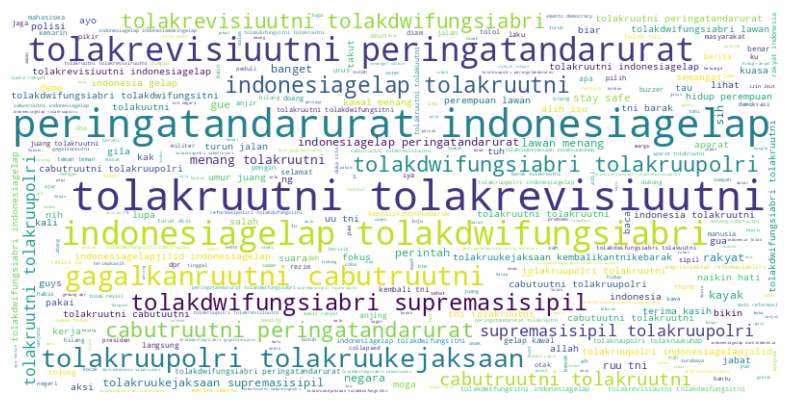

In [ ]:
text = ' '.join(df['stemming'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co,' 'rt', '...', 'amp', 'hehehe', 'ya', 't'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
text = " ".join(df["stemming"])

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co,' 'rt', '...', 'amp', 'hehehe', 'ya', 't'])

tokens = [word for word in text.split() if word not in stopwords]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, counts = zip(*top_words)

#Menggunakan warna pastel
colors = plt.cm.Pastel1(range(len(word)))

#Membuat plot
plt.figure(figsize=(12, 6))
bars = plt.bar(word, counts, color=colors)
plt.xlabel("Kata kata yang Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

#Menambahkan angka rata tengah di atas bar setiap bar
for bar, num in zip(bars, counts):
  plt.text(bar.get_x() + bar.get_width()/1.6 - 0.1, num + 1, str(num), fontsize = 12, color ='black', ha ='center')

plt.show()

In [ ]:
#Simpan data menjadi file excel
df.to_excel('/content/drive/MyDrive/Analisis Sentimen 2/tolakruutni_Preprocessing.xlsx', index=False) # Changed data to df

#Pelabelan data dengan Lexicon Based

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Analisis Sentimen 2/tolakruutni_Preprocessing.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_text    9827 non-null   object
 1   cleaning     9827 non-null   object
 2   casefolding  9827 non-null   object
 3   normalisasi  9827 non-null   object
 4   tokenize     9827 non-null   object
 5   stopword     9827 non-null   object
 6   stemming     9827 non-null   object
dtypes: object(7)
memory usage: 537.5+ KB


In [ ]:
data = pd.DataFrame(data[['stemming']])
data.head(5)

stemming
0                         indonesia gila tolakruutni
1  gila cepat gelap nih negeri tolakruutni tolakr...
2  turun jalan hati hati ya guys doa ku serta wak...
3  simpul satu partai republik idealis suara suar...
4     tni fokus tahan baik tingkat kerja tolakruutni

In [ ]:
#IMPORT LIBRARY
import pandas as pd
import random
import re
from google.colab import drive

#HUBUNGKAN GOOGLE DRIVE
print("Menghubungkan ke Google Drive...")
try:
    drive.mount('/content/drive')
    print("✅ Google Drive berhasil terhubung.")
except Exception as e:
    print(f"Peringatan: Gagal menghubungkan. Error: {e}")

#MEMUAT SEMUA DATA & KAMUS (DENGAN PERBAIKAN)
BASE_PATH = '/content/drive/MyDrive/Analisis Sentimen 2/'
#Ganti dengan nama file input yang sudah di-preprocessing
INPUT_FILE_PATH = BASE_PATH + 'tolakruutni_Preprocessing.xlsx'
OUTPUT_FILE_PATH = BASE_PATH + 'data_labeling_bobot_emoji_5kategori_final.xlsx'

try:
    # Memuat dataset utama Anda
    data = pd.read_excel(INPUT_FILE_PATH, engine='openpyxl')
    print(f"✅ Berhasil memuat {len(data)} data dari {INPUT_FILE_PATH}")

    positive_df = pd.read_excel(BASE_PATH + 'kamus_positive.xlsx', header=None, skiprows=1)
    negative_df = pd.read_excel(BASE_PATH + 'kamus_negative.xlsx', header=None, skiprows=1)

    positive_lexicon_weighted = dict(zip(positive_df[0].astype(str), positive_df[1].astype(float)))
    negative_lexicon_weighted = dict(zip(negative_df[0].astype(str), negative_df[1].astype(float)))
    print(f"✅ Berhasil memuat {len(positive_lexicon_weighted)} kata positif dan {len(negative_lexicon_weighted)} kata negatif.")

except FileNotFoundError as e:
    print(f"❌ ERROR: Salah satu file tidak ditemukan. Pastikan semua file ada di lokasi yang benar.")
    print(f"Detail: {e}")
    data = pd.DataFrame()
except Exception as e:
    print(f"❌ ERROR saat memuat file: {e}")
    data = pd.DataFrame()

#FUNGSI-FUNGSI (Sentiment & Emoji)

politic_terms = {
    'tolakruutni': -2, 'tolakrevisiuutni': -2, 'tolakdwifungsiabri': -2, 'indonesiagelap': -3
}
def determine_sentiment_lexicon(text):
    if not isinstance(text, str): return ('Netral', 0.0)
    lower_text = text.lower()
    sentiment_score = 0.0
    words = lower_text.split()
    for word in words:
        sentiment_score += positive_lexicon_weighted.get(word, 0)
        sentiment_score += negative_lexicon_weighted.get(word, 0)
    for term, score in politic_terms.items():
        if term in lower_text:
            sentiment_score += score
    if sentiment_score >= 2: return 'Positif', sentiment_score
    elif sentiment_score >= 0.5: return 'Agak Positif', sentiment_score
    elif sentiment_score <= -2: return 'Negatif', sentiment_score
    elif sentiment_score <= -0.5: return 'Agak Negatif', sentiment_score
    else: return 'Netral', sentiment_score
def determine_emoji(sentiment):
    emoji_dict = {'Positif': ['😊', '😍', '🥰', '😁', '🤩'],'Agak Positif': ['🙂', '😌', '☺️', '😇', '🤗'],'Netral': ['😐', '😑', '🤔', '😶', '🫤'],'Agak Negatif': ['😕', '🙁', '😟', '😬', '😞'],'Negatif': ['😡', '😠', '🤬', '😤', '👿']}
    return random.choice(emoji_dict.get(sentiment, ['-']))

#PROSES UTAMA PELABELAN DAN PENYIMPANAN
if not data.empty and 'stemming' in data.columns:
    print("\nMemulai proses analisis sentimen dan penambahan emosi...")
    results = data['stemming'].fillna('').apply(determine_sentiment_lexicon)
    data['Label'] = [result[0] for result in results]
    data['Score'] = [result[1] for result in results]
    data['Emosi'] = data['Label'].apply(determine_emoji)
    print("✅ Proses pelabelan selesai.")
    try:
        data.to_excel(OUTPUT_FILE_PATH, index=False, engine='openpyxl')
        print(f"\n✅ Hasil lengkap berhasil disimpan ke: {OUTPUT_FILE_PATH}")
        print(f"\nTotal data diproses: {len(data)}")
        print("Distribusi sentimen:")
        print(data['Label'].value_counts())
        print("\nContoh hasil akhir:")
        display_cols = [col for col in ['full_text', 'stemming', 'Label', 'Score', 'Emosi'] if col in data.columns]
        display(data[display_cols].head())
    except Exception as e:
        print(f"❌ Gagal menyimpan file ke Google Drive. Error: {e}")
elif 'data' in locals() and 'stemming' not in data.columns:
    print("❌ ERROR: Kolom 'stemming' tidak ditemukan dalam file.")
else:
    print("❌ Proses tidak dapat dilanjutkan karena gagal memuat data awal.")

Menghubungkan ke Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive berhasil terhubung.
✅ Berhasil memuat 9827 data dari /content/drive/MyDrive/Analisis Sentimen 2/tolakruutni_Preprocessing.xlsx
✅ Berhasil memuat 3612 kata positif dan 6611 kata negatif.

Memulai proses analisis sentimen dan penambahan emosi...
✅ Proses pelabelan selesai.

✅ Hasil lengkap berhasil disimpan ke: /content/drive/MyDrive/Analisis Sentimen 2/data_labeling_bobot_emoji_5kategori_final.xlsx

Total data diproses: 9827
Distribusi sentimen:
Label
Negatif         8426
Positif          692
Agak Negatif     285
Netral           238
Agak Positif     186
Name: count, dtype: int64

Contoh hasil akhir:


full_text  \
0     @barengwarga Indonesia makin gila #TolakRUUTNI   
1  @jackjackparrr gilaa udah cepet aja menuju gel...   
2  Buat kalian semua yang turun ke jalan tetap ha...   
3  Hampir pada kesimpulan tidak ada satupun parta...   
4  TNI fokus ke Pertahanan perbaiki tingkatkan ki...   

                                            stemming    Label  Score Emosi  
0                         indonesia gila tolakruutni  Negatif   -4.0     😠  
1  gila cepat gelap nih negeri tolakruutni tolakr...  Negatif  -10.0     🤬  
2  turun jalan hati hati ya guys doa ku serta wak...  Positif    3.0     😍  
3  simpul satu partai republik idealis suara suar...  Positif    6.0     😁  
4     tni fokus tahan baik tingkat kerja tolakruutni  Positif    3.0     😁

/tmp/ipython-input-51-1047717951.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


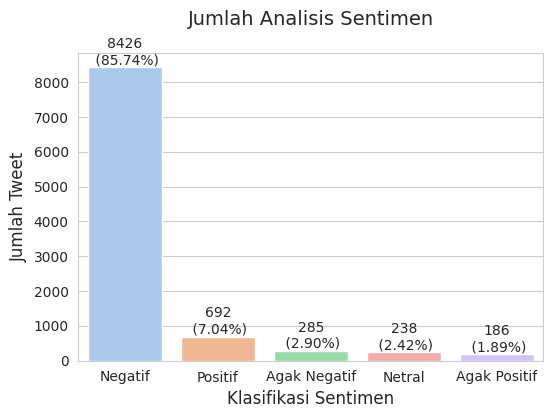

In [ ]:
# Membaca kembali data yang telah diberi label emosi
file_path = '/content/drive/MyDrive/Analisis Sentimen 2/data_labeling_bobot_emoji_5kategori_final.xlsx'
# Mengganti df dengan data agar konsisten dengan sel plotting berikutnya
data = pd.read_excel(file_path, engine='openpyxl')

# Sekarang 'data' DataFrame sudah terdefinisi

# Visualisasi distribusi sentimen
sentiment_count = data['Label'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Klasifikasi Sentimen', fontsize =12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Label'])
for i, count in enumerate(sentiment_count.values):
  Percentage = f'{100* count / total:.2f}%'
  ax.text(i, count + 0.10, f'{count}\n ({Percentage})', ha='center', va ='bottom')
plt.show()

#Split Data

In [ ]:
#IMPORT LIBRARY DAN SETUP PATH
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
import os

#Tentukan path lengkap ke file Excel
file_path = '/content/drive/MyDrive/Analisis Sentimen 2/data_labeling_bobot_emoji_5kategori_final.xlsx'


#FUNGSI UNTUK MELAKUKAN SPLIT DATA
def split_data_by_ratio(x_data, y_data, test_ratio, random_seed=42):
    """
    Fungsi untuk membagi data berdasarkan rasio test yang diberikan.
    """
    train_ratio = int((1 - test_ratio) * 100)
    test_ratio_print = int(test_ratio * 100)

    print("\n" + "="*40)
    print(f"Memulai Split Data Rasio: {train_ratio}:{test_ratio_print}")
    print("="*40)

    X_train, X_test, y_train, y_test = train_test_split(
        x_data, y_data, test_size=test_ratio, random_state=random_seed, stratify=y_data
    )

    print("Data berhasil dibagi.")
    print(f"Jumlah data training: {len(X_train)}")
    print(f"Jumlah data testing: {len(X_test)}")

    return X_train, X_test, y_train, y_test


#PROSES UTAMA: MEMUAT DATA DAN MENJALANKAN SPLIT

all_split_results = {}

if os.path.exists(file_path):
    print(f"\n✅ File ditemukan di: {file_path}")
    print("Memuat data dari file Excel...")
    df = pd.read_excel(file_path, engine='openpyxl')
    df['stemming'] = df['stemming'].fillna('')

    if 'stemming' in df.columns and 'Label' in df.columns:
        X = df['stemming']
        y = df['Label']

        split_ratios_to_test = {
            '80:20': 0.2,
            '70:30': 0.3,
            '60:40': 0.4
        }

        for ratio_name, test_size_value in split_ratios_to_test.items():
            X_train, X_test, y_train, y_test = split_data_by_ratio(X, y, test_size_value)
            all_split_results[ratio_name] = {
                'X_train': X_train, 'X_test': X_test,
                'y_train': y_train, 'y_test': y_test
            }

        print("\n\n✅ Semua proses split selesai. Hasil tersimpan dalam variabel 'all_split_results'.")

    else:
        print("❌ ERROR: Kolom 'stemming' atau 'Label' tidak ditemukan.")
else:
    print(f"❌ ERROR: File tidak ditemukan di path: {file_path}")

#Verifikasi dan Ringkasan Hasil Split
if all_split_results:
    print("\n" + "="*50)
    print("RINGKASAN HASIL SPLITTING DATA")
    print("="*50)
    print("Proses splitting untuk semua rasio telah berhasil.")
    print("Berikut adalah rincian jumlah data untuk setiap set:")

    # Loop melalui setiap hasil di dictionary dan cetak ringkasannya
    for ratio_name, data in all_split_results.items():
        print(f"\n--- Hasil untuk Rasio {ratio_name} ---")
        print(f"Jumlah data training: {len(data['X_train'])}")
        print(f"Jumlah data testing:  {len(data['X_test'])}")

    print("\n" + "="*50)
    print("Semua set data siap digunakan dari variabel 'all_split_results'.")


✅ File ditemukan di: /content/drive/MyDrive/Analisis Sentimen 2/data_labeling_bobot_emoji_5kategori_final.xlsx
Memuat data dari file Excel...

Memulai Split Data Rasio: 80:20
Data berhasil dibagi.
Jumlah data training: 7861
Jumlah data testing: 1966

Memulai Split Data Rasio: 70:30
Data berhasil dibagi.
Jumlah data training: 6878
Jumlah data testing: 2949

Memulai Split Data Rasio: 60:40
Data berhasil dibagi.
Jumlah data training: 5896
Jumlah data testing: 3931


✅ Semua proses split selesai. Hasil tersimpan dalam variabel 'all_split_results'.

RINGKASAN HASIL SPLITTING DATA
Proses splitting untuk semua rasio telah berhasil.
Berikut adalah rincian jumlah data untuk setiap set:

--- Hasil untuk Rasio 80:20 ---
Jumlah data training: 7861
Jumlah data testing:  1966

--- Hasil untuk Rasio 70:30 ---
Jumlah data training: 6878
Jumlah data testing:  2949

--- Hasil untuk Rasio 60:40 ---
Jumlah data training: 5896
Jumlah data testing:  3931

Semua set data siap digunakan dari variabel 'all_sp

#TF-IDF, SMOTE, K- FOLD CV, MODELING SVM dan Naive Bayes

In [ ]:
#IMPORT SEMUA LIBRARY YANG DIBUTUHKAN
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# Dictionary untuk menyimpan hasil akhir perbandingan
comparative_results = {}

#LOOP UTAMA: ITERASI MELALUI SETIAP RASIO SPLIT
# Loop ini berjalan 3 kali, untuk '80:20', '70:30', dan '60:40'
for ratio_name, data_split in all_split_results.items():

    print("\n" + "#"*60)
    print(f"# MEMULAI EKSPERIMEN UNTUK RASIO SPLIT: {ratio_name}")
    print("#"*60)

    # Ambil data train dan test untuk rasio saat ini
    X_train_main = data_split['X_train']
    y_train_main = data_split['y_train']
    X_test_final = data_split['X_test']
    y_test_final = data_split['y_test']

    # Definisikan pipeline untuk setiap model
    # Pipeline ini akan mengurus TF-IDF, SMOTE, dan Model secara otomatis dan aman
    pipeline_svm = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('smote', SMOTE(random_state=42)),
        ('model', SVC(kernel='linear', class_weight='balanced', random_state=42))
    ])

    pipeline_nb = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('smote', SMOTE(random_state=42)),
        ('model', MultinomialNB())
    ])

    models_with_pipelines = {
        "SVM": pipeline_svm,
        "Naive Bayes": pipeline_nb
    }

    #Simpan hasil untuk rasio
    results_for_this_ratio = {}

    #Proses K-Fold Cross-Validation
    for model_name, pipeline in models_with_pipelines.items():
        print(f"\n==== Menjalankan 5-Fold Cross-Validation untuk {model_name} pada rasio {ratio_name} ====")

        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        #Dapetinn skor CV rata-rata
        cv_scores = cross_val_score(pipeline, X_train_main, y_train_main, cv=kfold, scoring='accuracy')

        print(f"Rata-rata Akurasi CV: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

        #Proses Evaluasi Final pada Test Set
        #Latih model pada SELURUH data training untuk rasio ini
        pipeline.fit(X_train_main, y_train_main)

        #Lakukan prediksi pada data test final yang terpisah
        y_pred_final = pipeline.predict(X_test_final)

        #Hitung akurasi final
        final_accuracy = accuracy_score(y_test_final, y_pred_final)
        print(f"Akurasi Final pada Test Set: {final_accuracy:.4f}")

        #Hitung confusion matrix untuk visualisasi
        final_conf_matrix = confusion_matrix(y_test_final, y_pred_final)

        #Simpan hasil penting
        results_for_this_ratio[model_name] = {
            'cv_accuracy_mean': cv_scores.mean(),
            'cv_accuracy_std': cv_scores.std(),
            'final_test_accuracy': final_accuracy,
            'confusion_matrix': final_conf_matrix
        }

    #Masukkan hasil dari rasio ini ke dictionary utama
    comparative_results[ratio_name] = results_for_this_ratio


#TAMPILKAN TABEL PERBANDINGAN AKHIR
print("\n\n" + "="*60)
print("HASIL AKHIR EKSPERIMEN PERBANDINGAN RASIO SPLIT")
print("="*60)

#Ubah dictionary hasil menjadi DataFrame Pandas agar rapi
summary_list = []
for ratio, models_data in comparative_results.items():
    for model, metrics in models_data.items():
        summary_list.append({
            'Rasio Split': ratio,
            'Model': model,
            'Akurasi CV (Rata-rata)': metrics['cv_accuracy_mean'],
            'Akurasi Final (Test Set)': metrics['final_test_accuracy']
        })

summary_df = pd.DataFrame(summary_list)
#Mengurutkan tabel agar mudah dibaca
summary_df.sort_values(by=['Rasio Split', 'Model'], inplace=True)

#Menampilkan tabel hasil akhir
display(summary_df)


############################################################
# MEMULAI EKSPERIMEN UNTUK RASIO SPLIT: 80:20
############################################################

==== Menjalankan 5-Fold Cross-Validation untuk SVM pada rasio 80:20 ====
Rata-rata Akurasi CV: 0.8714 (+/- 0.0056)
Akurasi Final pada Test Set: 0.8632

==== Menjalankan 5-Fold Cross-Validation untuk Naive Bayes pada rasio 80:20 ====
Rata-rata Akurasi CV: 0.6757 (+/- 0.0032)
Akurasi Final pada Test Set: 0.6831

############################################################
# MEMULAI EKSPERIMEN UNTUK RASIO SPLIT: 70:30
############################################################

==== Menjalankan 5-Fold Cross-Validation untuk SVM pada rasio 70:30 ====
Rata-rata Akurasi CV: 0.8719 (+/- 0.0060)
Akurasi Final pada Test Set: 0.8678

==== Menjalankan 5-Fold Cross-Validation untuk Naive Bayes pada rasio 70:30 ====
Rata-rata Akurasi CV: 0.6727 (+/- 0.0204)
Akurasi Final pada Test Set: 0.6829

#####################################

Rasio Split        Model  Akurasi CV (Rata-rata)  Akurasi Final (Test Set)
5       60:40  Naive Bayes                0.671306                  0.684559
4       60:40          SVM                0.866350                  0.866701
3       70:30  Naive Bayes                0.672729                  0.682943
2       70:30          SVM                0.871910                  0.867752
1       80:20  Naive Bayes                0.675741                  0.683113
0       80:20          SVM                0.871390                  0.863174

In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import os

print("Memulai proses training dan penyimpanan model final...")

#PILIH DATA DARI RASIO TERBAIK
# Berdasarkan keputusan Anda, kita akan menggunakan data dari split 70:30
print("Menggunakan data dari split 70:30...")
chosen_split_data = all_split_results['70:30']
X_train_final = chosen_split_data['X_train']
y_train_final = chosen_split_data['y_train']

#MEMBUAT DIREKTORI PENYIMPANAN
# Tentukan path direktori
output_dir = "/content/drive/MyDrive/Analisis Sentimen 2/Model_Tersimpan"
# Buat direktori jika belum ada
os.makedirs(output_dir, exist_ok=True)
print(f"✅ Direktori '{output_dir}' siap.")


#MEMBUAT DAN MELATIH VECTORIZER FINAL ---
# Buat objek baru dan melatihnya HANYA pada 80% data training
print("Melatih TF-IDF Vectorizer pada seluruh data training (70%)...")
final_vectorizer = TfidfVectorizer()
X_train_tfidf_final = final_vectorizer.fit_transform(X_train_final)

#Simpan vectorizer ke file .pkl
VECTORIZER_PATH = os.path.join(output_dir, "vectorizer_tfidf.pkl")
joblib.dump(final_vectorizer, VECTORIZER_PATH)
print(f"✅ Vectorizer berhasil disimpan di: {VECTORIZER_PATH}")


#LANGKAH 4: MENERAPKAN SMOTE PADA DATA TRAINING FINAL
print("\nMenerapkan SMOTE pada data training yang sudah di-vectorize...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf_final, y_train_final)
print("Data training telah diseimbangkan.")


#LANGKAH 5: MEMBUAT DAN MELATIH MODEL FINAL
#Buat instance baru dari model terbaik(SVM)
print("\nMelatih model final (SVM) pada data training yang sudah seimbang...")
final_model = SVC(kernel='linear', class_weight='balanced', random_state=42)

#Latih model pada seluruh data training yang sudah siap
final_model.fit(X_train_balanced, y_train_balanced)
print("Model final berhasil dilatih.")


#LANGKAH 6: MENYIMPAN MODEL FINAL
MODEL_PATH = os.path.join(output_dir, "model_terbaik.pkl")
joblib.dump(final_model, MODEL_PATH)
print(f"✅ Model berhasil disimpan di: {MODEL_PATH}")

print("\n" + "="*50)
print("PROSES SELESAI! Aset 'vectorizer_tfidf.pkl' dan 'model_terbaik.pkl' siap digunakan untuk analisis berita.")
print("="*50)

Memulai proses training dan penyimpanan model final...
Menggunakan data dari split 70:30...
✅ Direktori '/content/drive/MyDrive/Analisis Sentimen 2/Model_Tersimpan' siap.
Melatih TF-IDF Vectorizer pada seluruh data training (70%)...
✅ Vectorizer berhasil disimpan di: /content/drive/MyDrive/Analisis Sentimen 2/Model_Tersimpan/vectorizer_tfidf.pkl

Menerapkan SMOTE pada data training yang sudah di-vectorize...
Data training telah diseimbangkan.

Melatih model final (SVM) pada data training yang sudah seimbang...
Model final berhasil dilatih.
✅ Model berhasil disimpan di: /content/drive/MyDrive/Analisis Sentimen 2/Model_Tersimpan/model_terbaik.pkl

PROSES SELESAI! Aset 'vectorizer_tfidf.pkl' dan 'model_terbaik.pkl' siap digunakan untuk analisis berita.


#Evaluasi

## Confusion Matrix SVM


############################################################
# HASIL VISUALISASI UNTUK RASIO SPLIT: 80:20
############################################################

--- Membuat plot untuk model: SVM ---


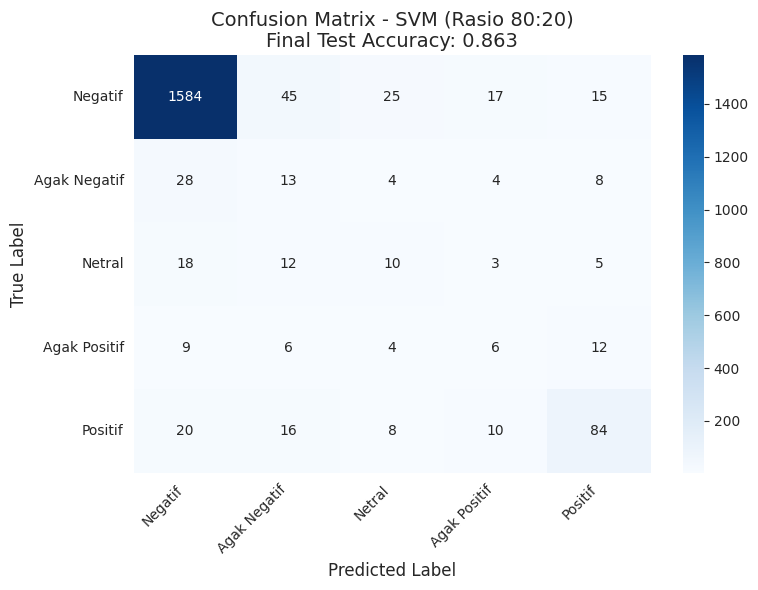


--- Membuat plot untuk model: Naive Bayes ---


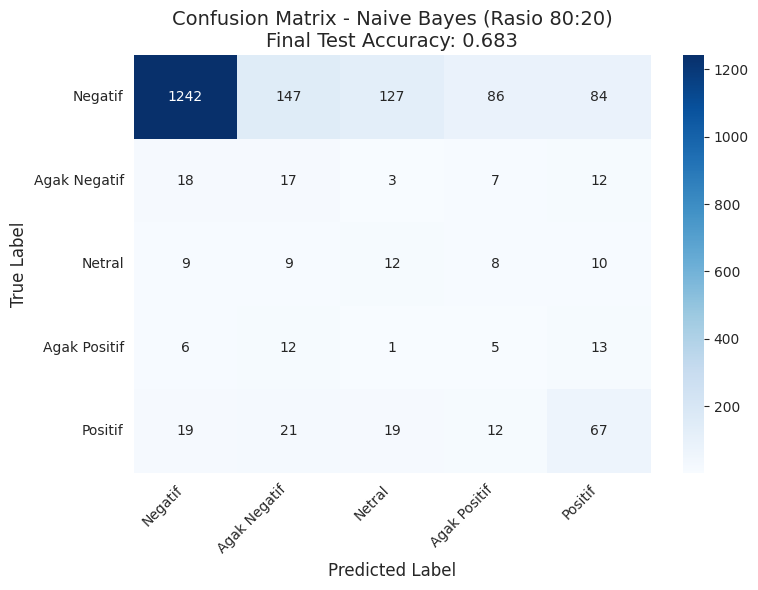


############################################################
# HASIL VISUALISASI UNTUK RASIO SPLIT: 70:30
############################################################

--- Membuat plot untuk model: SVM ---


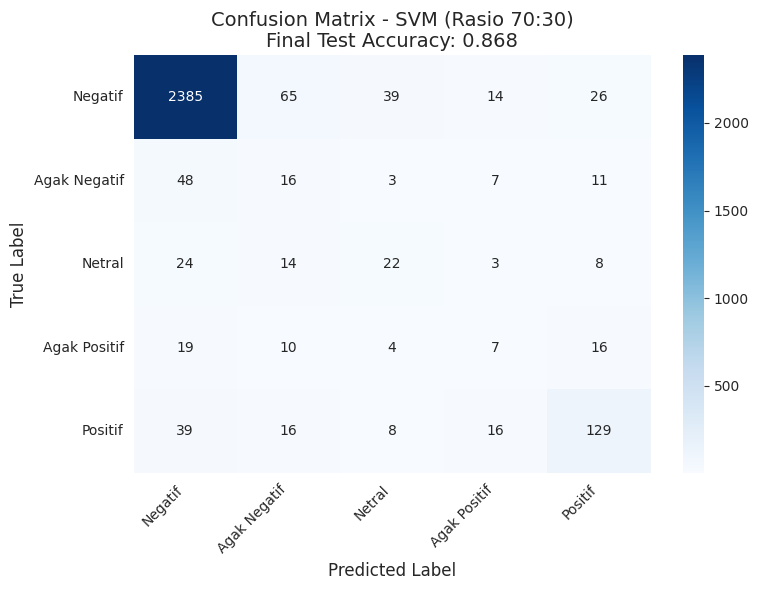


--- Membuat plot untuk model: Naive Bayes ---


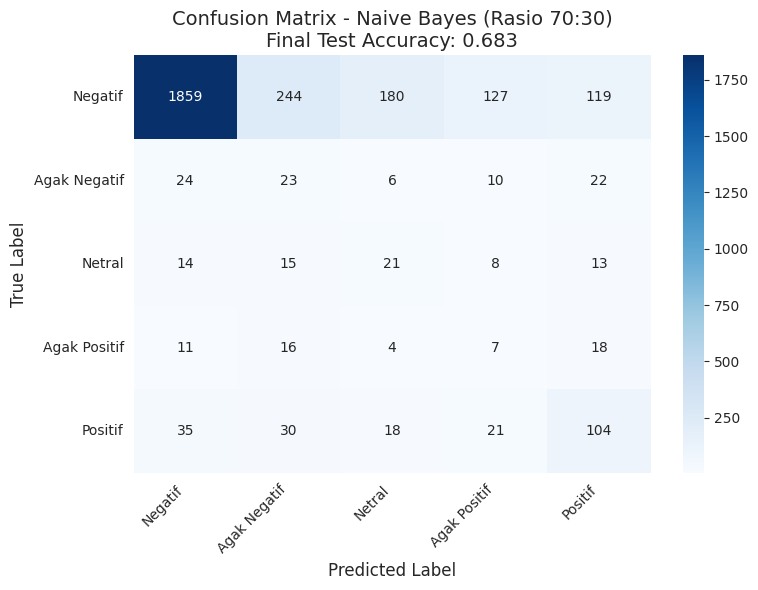


############################################################
# HASIL VISUALISASI UNTUK RASIO SPLIT: 60:40
############################################################

--- Membuat plot untuk model: SVM ---



--- Membuat plot untuk model: Naive Bayes ---


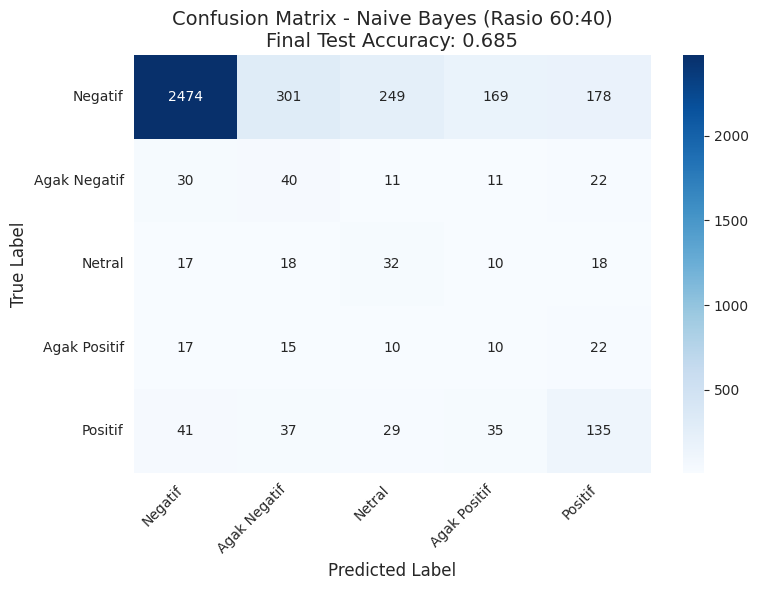

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definisikan urutan label semantik yang diinginkan sekali saja
semantic_order = ['Negatif', 'Agak Negatif', 'Netral', 'Agak Positif', 'Positif']

# Pastikan dictionary hasil ada isinya
if 'comparative_results' in locals() and comparative_results:

    # Loop Luar: Iterasi melalui setiap rasio ('80:20', '70:30', dll.)
    for ratio_name, models_data in comparative_results.items():

        print("\n" + "#"*60)
        print(f"# HASIL VISUALISASI UNTUK RASIO SPLIT: {ratio_name}")
        print("#"*60)

        # Ambil data y_test yang sesuai untuk rasio ini, dibutuhkan untuk mendapatkan urutan label asli
        y_test_for_this_ratio = all_split_results[ratio_name]['y_test']
        alphabetical_order = sorted(y_test_for_this_ratio.unique())

        # Loop Dalam: Iterasi melalui setiap model ('SVM', 'Naive Bayes') dalam rasio tersebut
        for model_name, metrics in models_data.items():

            # Ambil data spesifik dari dictionary hasil
            conf_matrix = metrics['confusion_matrix']
            accuracy = metrics['final_test_accuracy']

            print(f"\n--- Membuat plot untuk model: {model_name} ---")


            #Buat DataFrame dari matriks mentah dengan urutan label asli (alfabet)
            df_cm = pd.DataFrame(conf_matrix, index=alphabetical_order, columns=alphabetical_order)

            # Atur ulang urutan baris dan kolom agar sesuai dengan urutan semantik
            # Gunakan .fillna(0) untuk mengatasi jika ada kelas yang tidak muncul sama sekali
            df_cm_reordered = df_cm.reindex(index=semantic_order, columns=semantic_order).fillna(0)

            #Buat plot dari DataFrame yang sudah diatur ulang
            plt.figure(figsize=(8, 6))
            sns.heatmap(df_cm_reordered,
                        annot=True,
                        fmt='d', # 'd' untuk integer
                        cmap='Blues')

            #Buat judul yang dinamis sesuai dengan model dan rasio saat ini
            plt.title(f'Confusion Matrix - {model_name} (Rasio {ratio_name})\nFinal Test Accuracy: {accuracy:.3f}', fontsize=14)
            plt.ylabel('True Label', fontsize=12)
            plt.xlabel('Predicted Label', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
else:
    print("❌ Variabel 'comparative_results' tidak ditemukan. Pastikan Anda sudah menjalankan kode eksperimen sebelumnya.")

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

#Pastikan dictionary hasil ada isinya
if 'comparative_results' in locals() and comparative_results:

    # Loop Luar: Iterasi melalui setiap rasio ('80:20', '70:30', dll.)
    for ratio_name, models_data in comparative_results.items():

        print("\n" + "#"*60)
        print(f"# CLASSIFICATION REPORT UNTUK RASIO SPLIT: {ratio_name}")
        print("#"*60)

        # Loop Dalam: Iterasi melalui setiap model ('SVM', 'Naive Bayes') dalam rasio tersebut
        for model_name, metrics in models_data.items():

            if 'all_split_results' in locals() and all_split_results and ratio_name in all_split_results:
                X_train_main = all_split_results[ratio_name]['X_train']
                y_test_final = all_split_results[ratio_name]['y_test']

                pipeline_svm = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('smote', SMOTE(random_state=42)),
                    ('model', SVC(kernel='linear', class_weight='balanced', random_state=42))
                ])

                pipeline_nb = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('smote', SMOTE(random_state=42)),
                    ('model', MultinomialNB())
                ])

                pipelines = {
                    "SVM": pipeline_svm,
                    "Naive Bayes": pipeline_nb
                }

                if model_name in pipelines:
                    pipeline = pipelines[model_name]
                    pipeline.fit(X_train_main, all_split_results[ratio_name]['y_train'])
                    y_pred_final = pipeline.predict(all_split_results[ratio_name]['X_test'])

                    # Hitung classification report
                    report = classification_report(y_test_final, y_pred_final, output_dict=True)

                    print(f"\nClassification Report for {model_name}:")

                    report_df = pd.DataFrame(report).transpose()

                    styled_df = report_df.style.background_gradient(cmap='Blues')
                    styled_df = styled_df.format(precision=3)
                    display(styled_df)
                else:
                    print(f"Pipeline for model {model_name} not found.")
            else:
                print(f"Could not retrieve data split for ratio {ratio_name}. Skipping classification report.")

else:
    print("❌ Variabel 'comparative_results' tidak ditemukan. Pastikan Anda sudah menjalankan kode eksperimen sebelumnya.")


############################################################
# CLASSIFICATION REPORT UNTUK RASIO SPLIT: 80:20
############################################################

Classification Report for SVM:



Classification Report for Naive Bayes:



############################################################
# CLASSIFICATION REPORT UNTUK RASIO SPLIT: 70:30
############################################################

Classification Report for SVM:



Classification Report for Naive Bayes:



############################################################
# CLASSIFICATION REPORT UNTUK RASIO SPLIT: 60:40
############################################################

Classification Report for SVM:



Classification Report for Naive Bayes:


#Deployment


==== Perbandingan Akurasi Model Berdasarkan Rasio Split ====


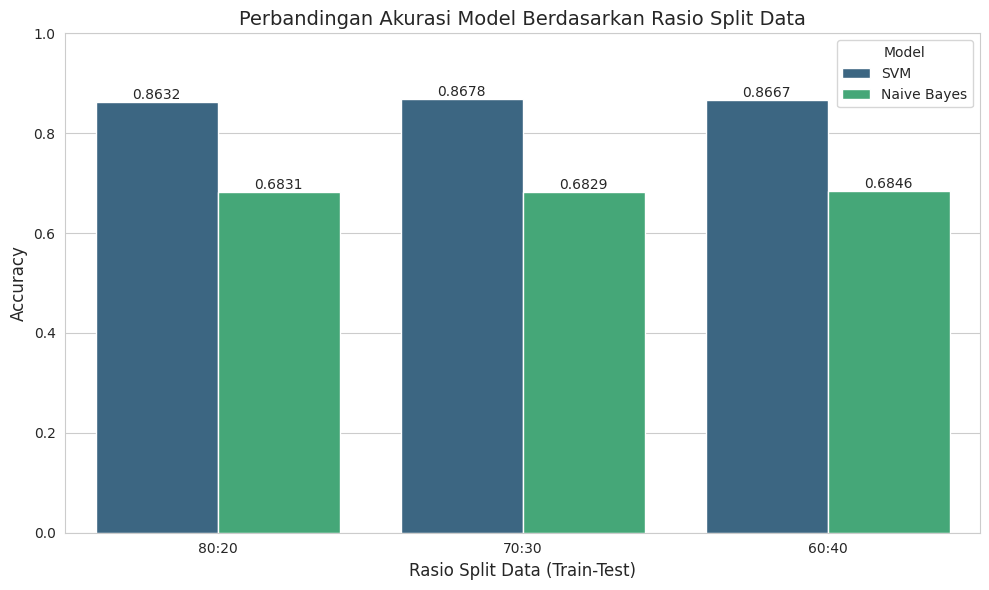


Kombinasi terbaik: Model SVM dengan rasio split 70:30
Akurasi: 0.8678


In [ ]:
# Visualisasi perbandingan akurasi untuk semua rasio split
print("\n==== Perbandingan Akurasi Model Berdasarkan Rasio Split ====")

# Extract data for plotting
model_names = []
split_ratios = []
accuracies = []

# Iterate through the comparative_results dictionary
for ratio_name, models_data in comparative_results.items():
    for model_name, metrics in models_data.items():
        model_names.append(model_name)
        split_ratios.append(ratio_name)
        accuracies.append(metrics['final_test_accuracy'])

# Create a DataFrame for easier plotting
accuracy_df = pd.DataFrame({
    'Rasio Split': split_ratios,
    'Model': model_names,
    'Accuracy': accuracies
})

# Use seaborn to create a grouped bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Rasio Split', y='Accuracy', hue='Model', data=accuracy_df, palette='viridis')

plt.title('Perbandingan Akurasi Model Berdasarkan Rasio Split Data', fontsize=14)
plt.xlabel('Rasio Split Data (Train-Test)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()

# Add accuracy values on top of the bars
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.4f')

plt.show()

# Find the best performing model across all splits
best_accuracy = 0
best_model_name = ""
best_split_ratio = ""

for ratio_name, models_data in comparative_results.items():
    for model_name, metrics in models_data.items():
        if metrics['final_test_accuracy'] > best_accuracy:
            best_accuracy = metrics['final_test_accuracy']
            best_model_name = model_name
            best_split_ratio = ratio_name

print(f"\nKombinasi terbaik: Model {best_model_name} dengan rasio split {best_split_ratio}")
print(f"Akurasi: {best_accuracy:.4f}")

##Wordcloud Label Positif,Negatif,dan Netral

In [ ]:
# Define the generate_wordcloud function
def generate_wordcloud(text, title):
    """
    Generates and displays a word cloud from the given text.

    Args:
        text (str): The text to generate the word cloud from.
        title (str): The title of the word cloud plot.
    """
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Load the dataframe with the 'Label' column
try:
    df_labeled = pd.read_excel('/content/drive/MyDrive/Analisis Sentimen 2/data_labeling_bobot_emoji_5kategori_final.xlsx', engine='openpyxl')
    print("Data with labels loaded successfully.")
except FileNotFoundError:
    print("Error: 'data_labeling_bobot_emoji_5kategori.xlsx' not found. Please ensure the file exists and the path is correct.")
    df_labeled = pd.DataFrame() # Create an empty DataFrame to avoid further errors

# Assuming you have 'sentiment_positive' defined as a string of positive words
# Replace this with your actual logic to get positive sentiment text
if not df_labeled.empty and 'Label' in df_labeled.columns and 'stemming' in df_labeled.columns:
    sentiment_positive = " ".join(df_labeled[df_labeled['Label'] == 'Positif']['stemming'].astype(str).tolist())

    # Call the function to generate the word cloud
    generate_wordcloud(sentiment_positive, "Word Cloud - Sentimen Positif")
else:
    print("Could not generate word cloud: Labeled data not available or missing required columns.")

Data with labels loaded successfully.


In [ ]:
# Define the generate_wordcloud function
def generate_wordcloud(text, title):
    """
    Generates and displays a word cloud from the given text.

    Args:
        text (str): The text to generate the word cloud from.
        title (str): The title of the word cloud plot.
    """
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Load the dataframe with the 'Label' column
try:
    df_labeled = pd.read_excel('/content/drive/MyDrive/Analisis Sentimen 2/data_labeling_bobot_emoji_5kategori_final.xlsx', engine='openpyxl')
    print("Data with labels loaded successfully.")
except FileNotFoundError:
    print("Error: 'data_labeling_bobot_emoji_5kategori.xlsx' not found. Please ensure the file exists and the path is correct.")
    df_labeled = pd.DataFrame() # Create an empty DataFrame to avoid further errors


# Assuming you have 'sentiment_positive' defined as a string of positive words
# Replace this with your actual logic to get positive sentiment text
if not df_labeled.empty and 'Label' in df_labeled.columns and 'stemming' in df_labeled.columns:
    sentiment_positive = " ".join(df_labeled[df_labeled['Label'] == 'Agak Positif']['stemming'].astype(str).tolist())

    # Call the function to generate the word cloud
    generate_wordcloud(sentiment_positive, "Word Cloud - Sentimen Agak Positif")
else:
    print("Could not generate word cloud: Labeled data not available or missing required columns.")

Data with labels loaded successfully.


In [ ]:
# Define the generate_wordcloud function
def generate_wordcloud(text, title):
    """
    Generates and displays a word cloud from the given text.

    Args:
        text (str): The text to generate the word cloud from.
        title (str): The title of the word cloud plot.
    """
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Assuming you have 'sentiment_positive' defined as a string of positive words
# Replace this with your actual logic to get positive sentiment text
sentiment_negative = " ".join(df_labeled[df_labeled['Label'] == 'Agak Negatif']['stemming'].astype(str).tolist())

# Call the function to generate the word cloud
generate_wordcloud(sentiment_negative, "Word Cloud - Sentimen Agak Negatif")

In [ ]:
# Define the generate_wordcloud function
def generate_wordcloud(text, title):
    """
    Generates and displays a word cloud from the given text.

    Args:
        text (str): The text to generate the word cloud from.
        title (str): The title of the word cloud plot.
    """
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Load the dataframe with the 'Label' column
try:
    df_labeled = pd.read_excel('/content/drive/MyDrive/Analisis Sentimen 2/data_labeling_bobot_emoji_5kategori_final.xlsx', engine='openpyxl')
    print("Data with labels loaded successfully.")
except FileNotFoundError:
    print("Error: 'data_labeling_bobot_emoji_5kategori.xlsx' not found. Please ensure the file exists and the path is correct.")
    df_labeled = pd.DataFrame() # Create an empty DataFrame to avoid further errors

# Assuming you have 'sentiment_positive' defined as a string of positive words
# Replace this with your actual logic to get positive sentiment text
if not df_labeled.empty and 'Label' in df_labeled.columns and 'stemming' in df_labeled.columns:
    sentiment_negative = " ".join(df_labeled[df_labeled['Label'] == 'Negatif']['stemming'].astype(str).tolist())

    # Call the function to generate the word cloud
    generate_wordcloud(sentiment_negative, "Word Cloud - Sentimen Negatif")
else:
    print("Could not generate word cloud: Labeled data not available or missing required columns.")

Data with labels loaded successfully.


In [ ]:
# Define the generate_wordcloud function
def generate_wordcloud(text, title):
    """
    Generates and displays a word cloud from the given text.

    Args:
        text (str): The text to generate the word cloud from.
        title (str): The title of the word cloud plot.
    """
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Load the dataframe with the 'Label' column
try:
    df_labeled = pd.read_excel('/content/drive/MyDrive/Analisis Sentimen 2/data_labeling_bobot_emoji_5kategori_final.xlsx', engine='openpyxl')
    print("Data with labels loaded successfully.")
except FileNotFoundError:
    print("Error: 'data_labeling_bobot_emoji_5kategori.xlsx' not found. Please ensure the file exists and the path is correct.")
    df_labeled = pd.DataFrame() # Create an empty DataFrame to avoid further errors

# Assuming you have 'sentiment_positive' defined as a string of positive words
# Replace this with your actual logic to get positive sentiment text
if not df_labeled.empty and 'Label' in df_labeled.columns and 'stemming' in df_labeled.columns:
    sentiment_netral = " ".join(df_labeled[df_labeled['Label'] == 'Netral']['stemming'].astype(str).tolist())

    # Call the function to generate the word cloud
    generate_wordcloud(sentiment_netral, "Word Cloud - Sentimen Netral")
else:
    print("Could not generate word cloud: Labeled data not available or missing required columns.")

Data with labels loaded successfully.



VISUALISASI DISTRIBUSI SENTIMEN UNTUK RASIO SPLIT: 70:30
Fitting pipelines for 70:30 split...
Fitting complete.


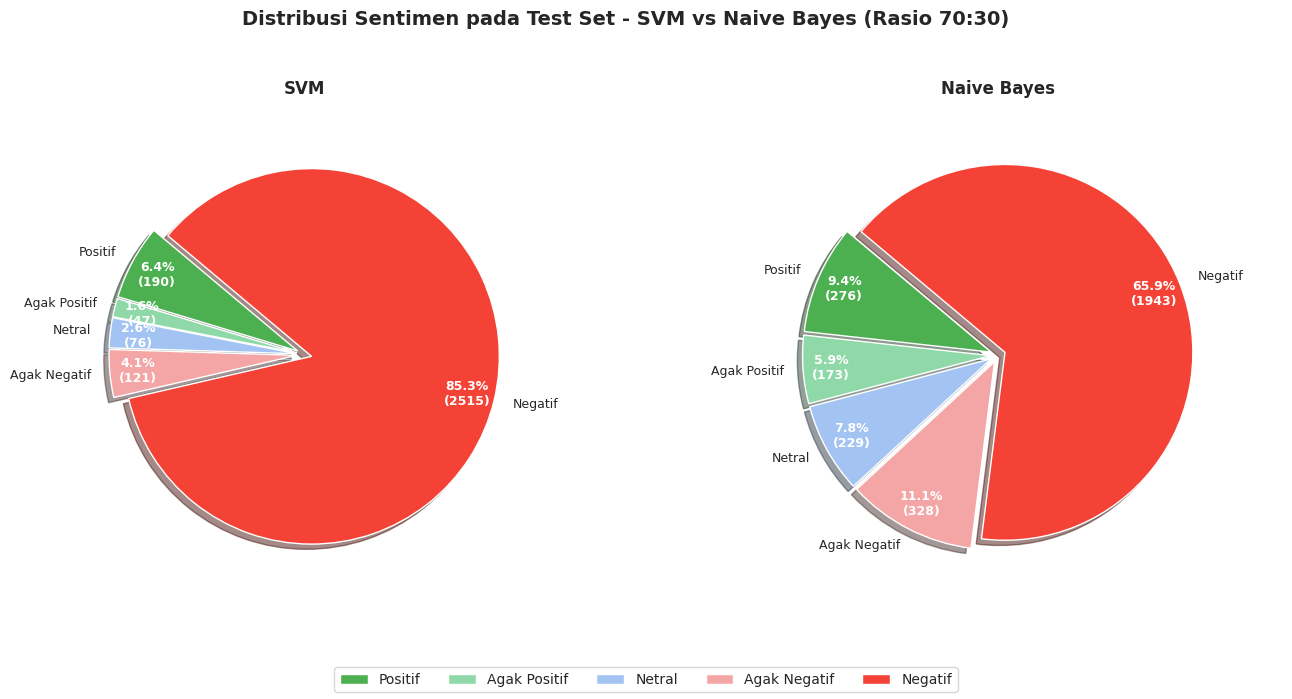

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Try to import required libraries, with fallback handling
try:
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.svm import SVC
    from sklearn.naive_bayes import MultinomialNB
    from imblearn.over_sampling import SMOTE
    from imblearn.pipeline import Pipeline  # Import dari imblearn untuk mendukung SMOTE
    imports_available = True
except ImportError as e:
    print(f"⚠️ Import error: {e}")
    print("Pastikan library sklearn dan imblearn sudah terinstall")
    imports_available = False

# Define the new sentiment categories and colors
new_sentiments = ['Positif', 'Agak Positif', 'Netral', 'Agak Negatif', 'Negatif']
colors = ['#4CAF50', '#8FD9A8', '#A3C4F3', '#F4A6A6', '#F44336']
explode = (0.04, 0.04, 0.04, 0.04, 0.04)  # separation for 5 slices

# Function to display percentage + count on the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        # Avoid division by zero or issues with non-numeric data
        if total == 0 or not isinstance(total, (int, float)):
          return ''
        count = int(round(pct * total / 100.0))
        # Only display label if percentage > 0
        return f'{pct:.1f}%\n({count})' if pct > 0 else ''
    return my_autopct


# Check if comparative_results is available and imports are successful
if not imports_available:
    print("❌ Tidak dapat melanjutkan karena library yang diperlukan tidak tersedia.")
elif 'comparative_results' not in locals() or not comparative_results:
    print("❌ Variabel 'comparative_results' tidak ditemukan atau kosong. Pastikan Anda sudah menjalankan kode eksperimen sebelumnya.")
else:
    # Specifically look for the 70:30 ratio
    ratio_name = "70:30"

    if ratio_name in comparative_results:
        models_data = comparative_results[ratio_name]

        print("\n" + "="*60)
        print(f"VISUALISASI DISTRIBUSI SENTIMEN UNTUK RASIO SPLIT: {ratio_name}")
        print("="*60)

        # Check if there are exactly two models to compare side-by-side
        if len(models_data) == 2:
            model_names = list(models_data.keys())
            model1_name = model_names[0]
            model2_name = model_names[1]

            # Access the X_test data for this ratio
            if 'all_split_results' in locals() and all_split_results and ratio_name in all_split_results:
                 X_test_final = all_split_results[ratio_name]['X_test']
                 y_test_final = all_split_results[ratio_name]['y_test'] # Also get y_test for labels

                 # Define the pipeline menggunakan imblearn Pipeline untuk mendukung SMOTE
                 try:
                     pipeline_svm = Pipeline([
                         ('tfidf', TfidfVectorizer()),
                         ('smote', SMOTE(random_state=42)),
                         ('model', SVC(kernel='linear', class_weight='balanced', random_state=42))
                     ])

                     pipeline_nb = Pipeline([
                         ('tfidf', TfidfVectorizer()),
                         ('smote', SMOTE(random_state=42)),
                         ('model', MultinomialNB())
                     ])

                     pipelines = {
                         "SVM": pipeline_svm,
                         "Naive Bayes": pipeline_nb
                     }

                     model1_pipeline = pipelines.get(model1_name)
                     model2_pipeline = pipelines.get(model2_name)

                     if model1_pipeline and model2_pipeline:
                          # Fit pipelines on the training data corresponding to this ratio
                          if ratio_name in all_split_results:
                              X_train_main = all_split_results[ratio_name]['X_train']
                              y_train_main = all_split_results[ratio_name]['y_train']

                              print(f"Fitting pipelines for {ratio_name} split...")
                              model1_pipeline.fit(X_train_main, y_train_main)
                              model2_pipeline.fit(X_train_main, y_train_main)
                              print("Fitting complete.")

                              # Get predictions on the test data
                              y_pred_model1 = model1_pipeline.predict(X_test_final)
                              y_pred_model2 = model2_pipeline.predict(X_test_final)

                              # Calculate sentiment counts for each model's predictions, reindex to ensure all categories are present
                              model1_sentiment_counts = pd.Series(y_pred_model1).value_counts().reindex(new_sentiments, fill_value=0)
                              model2_sentiment_counts = pd.Series(y_pred_model2).value_counts().reindex(new_sentiments, fill_value=0)

                              # --- Plotting ---
                              fig, axes = plt.subplots(1, 2, figsize=(14, 7), facecolor='white')

                              # Function to create better autopct that handles small percentages
                              def smart_autopct(pct, counts):
                                  def my_autopct(pct_val):
                                      if pct_val < 1:  # Don't show label for very small slices
                                          return ''
                                      total = sum(counts)
                                      count = int(round(pct_val * total / 100.0))
                                      return f'{pct_val:.1f}%\n({count})'
                                  return my_autopct

                              # Pie Chart for Model 1 (SVM) with better spacing
                              wedges1, texts1, autotexts1 = axes[0].pie(model1_sentiment_counts,
                                                                         explode=explode,
                                                                         labels=new_sentiments,
                                                                         colors=colors,
                                                                         autopct=smart_autopct(model1_sentiment_counts, model1_sentiment_counts),
                                                                         shadow=True,
                                                                         startangle=140,
                                                                         textprops={'fontsize': 9},
                                                                         pctdistance=0.85,
                                                                         labeldistance=1.1)

                              # Improve text positioning for model 1
                              for autotext in autotexts1:
                                  autotext.set_color('white')
                                  autotext.set_fontweight('bold')

                              axes[0].axis('equal')
                              axes[0].set_title(model1_name, fontsize=12, fontweight='bold', pad=20)

                              # Pie Chart for Model 2 (Naive Bayes)
                              wedges2, texts2, autotexts2 = axes[1].pie(model2_sentiment_counts,
                                                                         explode=explode,
                                                                         labels=new_sentiments,
                                                                         colors=colors,
                                                                         autopct=smart_autopct(model2_sentiment_counts, model2_sentiment_counts),
                                                                         shadow=True,
                                                                         startangle=140,
                                                                         textprops={'fontsize': 9},
                                                                         pctdistance=0.85,
                                                                         labeldistance=1.1)

                              # Improve text positioning for model 2
                              for autotext in autotexts2:
                                  autotext.set_color('white')
                                  autotext.set_fontweight('bold')

                              axes[1].axis('equal')
                              axes[1].set_title(model2_name, fontsize=12, fontweight='bold', pad=20)

                              # Overall title
                              plt.suptitle(f'Distribusi Sentimen pada Test Set - {model1_name} vs {model2_name} (Rasio {ratio_name})',
                                          fontsize=14, fontweight='bold', y=0.98)
                              plt.tight_layout(rect=[0, 0.03, 1, 0.95])

                              # Add legend outside the pie charts
                              plt.figlegend(wedges1, new_sentiments, loc='lower center', ncol=5, fontsize=10)
                              plt.subplots_adjust(bottom=0.15)

                              plt.show()
                          else:
                              print(f"Error: Training data not found for ratio {ratio_name}.")
                     else:
                         print(f"Error: Could not find pipelines for models {model1_name} or {model2_name}.")
                         print(f"Available models: {list(pipelines.keys())}")
                         print(f"Requested models: {model1_name}, {model2_name}")

                 except Exception as e:
                     print(f"Error creating or fitting pipelines: {e}")
                     print("Pastikan menggunakan imblearn.pipeline.Pipeline untuk mendukung SMOTE")

            else:
                print(f"Error: Test data not found for ratio {ratio_name}. Skipping plotting.")
                if 'all_split_results' in locals():
                    print(f"Available ratios in all_split_results: {list(all_split_results.keys())}")
                else:
                    print("Variable 'all_split_results' not found.")

        else:
            print(f"Skipping plotting for ratio {ratio_name}: Expected 2 models, found {len(models_data)}.")
            if len(models_data) > 0:
                print(f"Available models: {list(models_data.keys())}")
    else:
        print(f"❌ Rasio split '{ratio_name}' tidak ditemukan dalam 'comparative_results'.")
        print("Rasio yang tersedia:", list(comparative_results.keys()) if comparative_results else "Tidak ada")

In [ ]:
# === KODINGAN KATEGORISASI (VERSI PERBAIKAN KAMUS KATA KUNCI) ===

# --- 1. IMPORT LIBRARY DAN PERSIAPAN ---
import pandas as pd
import re
import os
from google.colab import drive
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # Pindahkan import ke atas

print("Menghubungkan ke Google Drive...")
try:
    drive.mount('/content/drive')
    print("✅ Google Drive berhasil terhubung.")
except Exception as e:
    print(f"❌ Peringatan: Gagal menghubungkan. Error: {e}")

file_path = '/content/drive/MyDrive/Analisis Sentimen 2/data_labeling_bobot_emoji_5kategori_final.xlsx'
output_path_kategori = '/content/drive/MyDrive/Analisis Sentimen 2/data_kategori_pasal_final.xlsx'

try:
    df = pd.read_excel(file_path, engine='openpyxl')
    print(f"✅ Data berhasil dimuat dari {file_path}. Jumlah data: {len(df)}")
except FileNotFoundError:
    print(f"❌ Error: File {file_path} tidak ditemukan.")
    df = pd.DataFrame()

# --- 2. KAMUS KATA KUNCI (FORMAT DIPERBAIKI) ---
print("\nMembuat kamus kata kunci dengan format yang benar...")
keyword_categories_pasal = {
    'Perluasan Tugas Operasi Militer': [
        'siber', 'militerisasi', 'wewenang', 'perlindungan', 'luar negeri', 'ancaman',
        'internet', 'digital', 'hacker', 'keamanan', 'intelijen', 'penanggulangan'
    ],
    'Jabatan Sipil Prajurit Aktif': [
        'dwifungsi', 'sipil', 'jabatan', 'militer', 'kementerian', 'lembaga',
        'tni aktif', 'pengangkatan', 'perwira', 'politik', 'aparat', 'pemerintah'
    ],
    'Perpanjangan Usia Pensiun': [
        'pensiun', 'usia', 'bintara', 'tamtama', 'perwira', 'regenerasi',
        '62 tahun', '55 tahun', 'personel', 'profesionalisme', 'masa kerja',
    ]
}
print("✅ Kamus kata kunci siap.")

# --- 3. FUNGSI KATEGORISASI  ---
def categorize_text_by_issue(text, keyword_dict):
    if not isinstance(text, str): return 'Lain-lain'
    lower_text = text.lower()
    found_categories = set()
    for category, keywords in keyword_dict.items():
        if any(re.search(r'\b' + re.escape(keyword) + r'\b', lower_text) for keyword in keywords):
            found_categories.add(category)
    if len(found_categories) == 1:
        return list(found_categories)[0]
    else:
        return 'Lain-lain'

# --- 4. PROSES KATEGORISASI DAN PENYIMPANAN ---
if not df.empty and 'stemming' in df.columns:
    print("\nMemulai proses kategorisasi berdasarkan pasal kontroversial...")
    df['Kategori_Pasal'] = df['stemming'].apply(lambda text: categorize_text_by_issue(text, keyword_categories_pasal))

    df_filtered_pasal = df[df['Kategori_Pasal'] != 'Lain-lain'].copy()
    print("✅ Proses kategorisasi awal selesai.")

    print("\nMengubah nama kategori menjadi format 'Mengarah ke Pasal X'...")
    nama_pasal_mapping = {
        'Perluasan Tugas Operasi Militer': 'Mengarah ke Pasal 7',
        'Jabatan Sipil Prajurit Aktif': 'Mengarah ke Pasal 47',
        'Perpanjangan Usia Pensiun': 'Mengarah ke Pasal 53'
    }
    df_filtered_pasal['Kategori_Pasal'] = df_filtered_pasal['Kategori_Pasal'].map(nama_pasal_mapping)
    print("✅ Nama kategori berhasil disesuaikan.")

    print("\nDistribusi Kategori Topik Berdasarkan Pasal Kontroversial:")
    print(df_filtered_pasal['Kategori_Pasal'].value_counts())

    try:
        df_filtered_pasal.to_excel(output_path_kategori, index=False, engine='openpyxl')
        print(f"\nHasil kategorisasi topik baru disimpan ke: {output_path_kategori}")

        print("\nContoh DataFrame setelah Kategorisasi (10 baris pertama):")
        # Menampilkan kolom yang relevan
        display(df_filtered_pasal[['stemming', 'Label', 'Kategori_Pasal']].head(10))
    except Exception as e:
        print(f"❌ Gagal menyimpan file. Error: {e}")
else:
    print("DataFrame kosong atau kolom 'stemming' tidak ditemukan. Proses dibatalkan.")

Menghubungkan ke Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive berhasil terhubung.
✅ Data berhasil dimuat dari /content/drive/MyDrive/Analisis Sentimen 2/data_labeling_bobot_emoji_5kategori_final.xlsx. Jumlah data: 9827

Membuat kamus kata kunci dengan format yang benar...
✅ Kamus kata kunci siap.

Memulai proses kategorisasi berdasarkan pasal kontroversial...
✅ Proses kategorisasi awal selesai.

Mengubah nama kategori menjadi format 'Mengarah ke Pasal X'...
✅ Nama kategori berhasil disesuaikan.

Distribusi Kategori Topik Berdasarkan Pasal Kontroversial:
Kategori_Pasal
Mengarah ke Pasal 47    559
Mengarah ke Pasal 7      15
Mengarah ke Pasal 53      9
Name: count, dtype: int64

Hasil kategorisasi topik baru disimpan ke: /content/drive/MyDrive/Analisis Sentimen 2/data_kategori_pasal_final.xlsx

Contoh DataFrame setelah Kategorisasi (10 baris pertama):


stemming    Label  \
13         aparat tni jabat rakyat sempat tolakruutni  Negatif   
18  tni jabat sipil kasih tugas cabut pagar milik ...  Negatif   
29  banget ya platform belah miris baca muncul gag...  Negatif   
33  gue ambil risiko besar ng omong tolakruutni ap...  Negatif   
37  capek ah main sosmed isi buzzer mulu ganti nam...  Negatif   
42  ruu tni potensi luas peran militer politik amp...  Negatif   
44  perintah suka banget bikin gebrak gebrak milit...  Negatif   
45  cari kerja susah perintah bertingingin sah dwi...  Negatif   
47  saat rakyat susah cari kerja saat phk massal d...  Negatif   
48    baik otoritarianisme dwifungsi abri tolakruutni   Netral   

          Kategori_Pasal  
13  Mengarah ke Pasal 47  
18  Mengarah ke Pasal 47  
29  Mengarah ke Pasal 47  
33  Mengarah ke Pasal 47  
37   Mengarah ke Pasal 7  
42  Mengarah ke Pasal 47  
44  Mengarah ke Pasal 47  
45  Mengarah ke Pasal 47  
47  Mengarah ke Pasal 47  
48  Mengarah ke Pasal 47

✅ Data berhasil dimuat dari /content/drive/MyDrive/Analisis Sentimen 2/data_labeling_bobot_emoji_5kategori_final.xlsx. Jumlah data: 9827

Membuat kamus kata kunci untuk target sentimen...
✅ Kamus kata kunci siap.

Memulai proses kategorisasi target sentimen...
✅ Proses kategorisasi selesai.

Distribusi Target Sentimen (dari tweet yang relevan):
Target_Sentimen
Aparat Keamanan           992
Lembaga Legislatif        132
Pemerintah & Pejabat       64
Tokoh Politik Spesifik     50
Name: count, dtype: int64

Hasil kategorisasi target sentimen disimpan ke: /content/drive/MyDrive/Analisis Sentimen 2/data_target_kemarahan.xlsx

Membuat plot visualisasi...


/tmp/ipython-input-65-1564056272.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


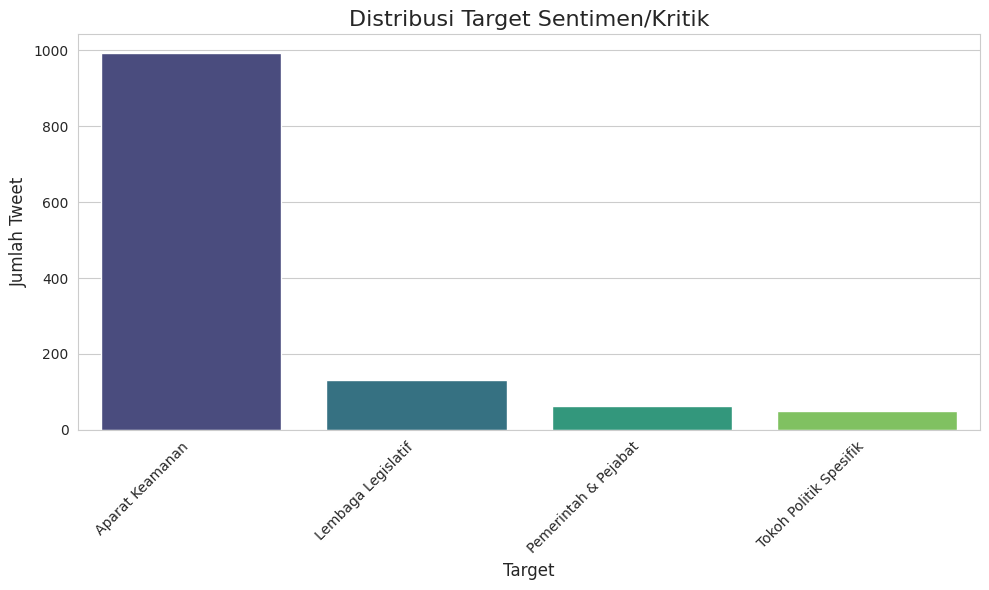

In [ ]:
# === KODINGAN LENGKAP: KATEGORISASI TARGET SENTIMEN ===

# --- 1. IMPORT LIBRARY ---
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. PERSIAPAN PATH DAN MEMUAT DATA ---

# Path ke file input Anda di Google Drive
# PASTIKAN PATH DAN NAMA FILE INI SUDAH BENAR
file_path = '/content/drive/MyDrive/Analisis Sentimen 2/data_labeling_bobot_emoji_5kategori_final.xlsx'
# Path untuk menyimpan hasil baru
output_path_kategori = '/content/drive/MyDrive/Analisis Sentimen 2/data_target_kemarahan.xlsx'

try:
    df = pd.read_excel(file_path, engine='openpyxl')
    print(f"✅ Data berhasil dimuat dari {file_path}. Jumlah data: {len(df)}")
except FileNotFoundError:
    print(f"❌ ERROR: File tidak ditemukan di '{file_path}'. Mohon periksa kembali path dan nama filenya.")
    df = pd.DataFrame() # Buat dataframe kosong agar tidak error di bawah
except Exception as e:
    print(f"❌ ERROR saat memuat file: {e}")
    df = pd.DataFrame()

# --- 3. KAMUS KATA KUNCI UNTUK TARGET KEMARAHAN ---
# Mengelompokkan kata kunci yang Anda berikan ke dalam kategori yang lebih luas
if not df.empty:
    print("\nMembuat kamus kata kunci untuk target sentimen...")
    keyword_categories_target = {
        'Aparat Keamanan': ['aparat', 'polisi', 'tni', 'militer'],
        'Pemerintah & Pejabat': ['pemerintah', 'pejabat','menteri', 'presiden', 'jokowi'],
        'Tokoh Politik Spesifik': ['prabowo', 'gibran', 'puan'],
        'Lembaga Legislatif': ['dpr', 'wakil rakyat']
    }
    print("✅ Kamus kata kunci siap.")

# --- 4. FUNGSI KATEGORISASI ---
def categorize_text_by_target(text, keyword_dict):
    """
    Fungsi untuk mengkategorikan target sentimen berdasarkan kata kunci.
    """
    if not isinstance(text, str):
        return 'Tidak Spesifik'

    lower_text = text.lower()
    found_categories = set()

    for category, keywords in keyword_dict.items():
        if any(re.search(r'\b' + re.escape(keyword) + r'\b', lower_text) for keyword in keywords):
            found_categories.add(category)

    if len(found_categories) == 1:
        return list(found_categories)[0]
    else:
        return 'Tidak Spesifik'

# --- 5. PROSES KATEGORISASI, VISUALISASI, DAN PENYIMPANAN ---
if not df.empty and 'stemming' in df.columns:
    print("\nMemulai proses kategorisasi target sentimen...")

    # Terapkan fungsi pada kolom 'stemming'
    df['Target_Sentimen'] = df['stemming'].apply(lambda text: categorize_text_by_target(text, keyword_categories_target))

    # Filter data untuk menghapus baris yang targetnya tidak spesifik
    df_filtered_target = df[df['Target_Sentimen'] != 'Tidak Spesifik'].copy()

    print("✅ Proses kategorisasi selesai.")

    # Tampilkan distribusi target sentimen
    print("\n" + "="*50)
    print("Distribusi Target Sentimen (dari tweet yang relevan):")
    print("="*50)
    target_counts = df_filtered_target['Target_Sentimen'].value_counts()
    print(target_counts)
    print("="*50)

    # Simpan DataFrame yang sudah diberi kategori baru ke file Excel
    try:
        # Membuat folder output jika belum ada
        os.makedirs(os.path.dirname(output_path_kategori), exist_ok=True)
        df_filtered_target.to_excel(output_path_kategori, index=False, engine='openpyxl')
        print(f"\nHasil kategorisasi target sentimen disimpan ke: {output_path_kategori}")

        # --- Membuat Visualisasi ---
        if not target_counts.empty:
            print("\nMembuat plot visualisasi...")
            plt.figure(figsize=(10, 6))
            sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
            plt.title('Distribusi Target Sentimen/Kritik', fontsize=16)
            plt.xlabel('Target', fontsize=12)
            plt.ylabel('Jumlah Tweet', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"❌ Gagal menyimpan atau membuat plot. Error: {e}")

else:
    if not df.empty:
        print("❌ Kolom 'stemming' tidak ditemukan di DataFrame. Proses dibatalkan.")

In [ ]:
# --- 1. IMPORT LIBRARY DAN PERSIAPAN ---
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report
import re
import string
!pip install Sastrawi -q
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# --- 2. DEFINISI FUNGSI PREPROCESSING ---
print("Mendefinisikan fungsi preprocessing...")
try:
    stemmer = StemmerFactory().create_stemmer()
    def preprocess_text(text):
        if not isinstance(text, str):
            return ""
        text = text.lower()
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\d+', '', text)
        text = text.strip()
        text = stemmer.stem(text)
        return text
    print("✅ Fungsi 'preprocess_text' siap digunakan.")
except Exception as e:
    print(f"❌ Gagal membuat stemmer. Pastikan library Sastrawi terinstal. Error: {e}")


# --- 3. MEMUAT SEMUA ASET ---
PAKAR_FILE_PATH = "/content/drive/MyDrive/Analisis Sentimen 2/Pakar/Hasil_Akhir_Validasi_Tweet.xlsx"
MODEL_PATH = "/content/drive/MyDrive/Analisis Sentimen 2/Model_Tersimpan/model_terbaik.pkl"
VECTORIZER_PATH = "/content/drive/MyDrive/Analisis Sentimen 2/Model_Tersimpan/vectorizer_tfidf.pkl"

try:
    print("\nMemuat data hasil validasi pakar...")
    df_pakar = pd.read_excel(PAKAR_FILE_PATH)
    valid_sentiments = ['Positif', 'Agak Positif', 'Netral', 'Agak Negatif', 'Negatif']
    df_pakar = df_pakar[df_pakar['Sentimen Final Pakar'].isin(valid_sentiments)].copy()
    print(f"✅ Berhasil memuat {len(df_pakar)} data valid dari pakar.")

    print("\nMemuat model dan vectorizer...")
    model = joblib.load(MODEL_PATH)
    vectorizer = joblib.load(VECTORIZER_PATH)
    print("✅ Model dan vectorizer berhasil dimuat.")

    # Definisikan urutan label yang diinginkan
    label_order = ['Negatif', 'Agak Negatif', 'Netral', 'Agak Positif', 'Positif']

    # --- 4. EVALUASI #1: KUALITAS PELABELAN KAMUS ---
    print("\n" + "="*50)
    print("EVALUASI #1: PELABELAN OTOMATIS (KAMUS) VS. PAKAR")
    print("="*50)

    y_true_kamus = df_pakar['Sentimen Final Pakar']
    y_pred_kamus = df_pakar['Label otomatis']

    accuracy_kamus = accuracy_score(y_true_kamus, y_pred_kamus)
    print(f"Akurasi Pelabelan Kamus: {accuracy_kamus:.2%}")
    print("\nLaporan Klasifikasi (Kamus vs Pakar):")
    print(classification_report(y_true_kamus, y_pred_kamus, labels=label_order, zero_division=0))

    # --- 5. EVALUASI #2: PERFORMA MODEL FINAL ---
    print("\n" + "="*50)
    print(f"EVALUASI #2: PERFORMA MODEL {type(model).__name__} FINAL VS. PAKAR")
    print("="*50)

    if 'Tweet' in df_pakar.columns:
        teks_untuk_diuji = df_pakar['Tweet']
    else:
        teks_untuk_diuji = df_pakar['Teks Tweet Asli']

    # Lakukan preprocessing
    print("Melakukan preprocessing pada data uji...")
    teks_bersih = teks_untuk_diuji.apply(preprocess_text)

    # Lakukan prediksi dengan model yang sudah dilatih
    print("Melakukan prediksi dengan model...")
    vektor_teks = vectorizer.transform(teks_bersih)
    y_pred_model = model.predict(vektor_teks)

    y_true_model = df_pakar['Sentimen Final Pakar']
    accuracy_model = accuracy_score(y_true_model, y_pred_model)
    print(f"\nAkurasi Model Final vs Pakar: {accuracy_model:.2%}")
    print(f"\nLaporan Klasifikasi (Model {type(model).__name__} vs Pakar):")
    print(classification_report(y_true_model, y_pred_model, labels=label_order, zero_division=0))

except FileNotFoundError as e:
    print(f"❌ ERROR: Salah satu file tidak ditemukan. Pastikan semua path benar. Detail: {e}")
except NameError as e:
    print(f"❌ ERROR: Variabel atau fungsi belum didefinisikan. Pastikan Anda sudah menjalankan sel untuk 'preprocess_text'. Detail: {e}")
except Exception as e:
    print(f"❌ ERROR: Terjadi masalah. Detail: {e}")

Mendefinisikan fungsi preprocessing...
✅ Fungsi 'preprocess_text' siap digunakan.

Memuat data hasil validasi pakar...
✅ Berhasil memuat 400 data valid dari pakar.

Memuat model dan vectorizer...
✅ Model dan vectorizer berhasil dimuat.

EVALUASI #1: PELABELAN OTOMATIS (KAMUS) VS. PAKAR
Akurasi Pelabelan Kamus: 71.00%

Laporan Klasifikasi (Kamus vs Pakar):
              precision    recall  f1-score   support

     Negatif       0.87      0.83      0.85       333
Agak Negatif       0.15      0.11      0.13        35
      Netral       0.00      0.00      0.00         3
Agak Positif       0.09      0.06      0.07        17
     Positif       0.11      0.33      0.17        12

    accuracy                           0.71       400
   macro avg       0.24      0.27      0.24       400
weighted avg       0.74      0.71      0.72       400


EVALUASI #2: PERFORMA MODEL SVC FINAL VS. PAKAR
Melakukan preprocessing pada data uji...
Melakukan prediksi dengan model...

Akurasi Model Final vs Paka

In [ ]:
# === KODINGAN FINAL UNTUK TOP KOTA GEO CHART (VERSI PERBAIKAN) ===

# --- 1. IMPORT LIBRARY DAN HUBUNGKAN DRIVE ---
import pandas as pd
import os
import re
from google.colab import drive

print("Menghubungkan ke Google Drive...")
try:
    drive.mount('/content/drive')
    print("✅ Google Drive berhasil terhubung.")
except Exception as e:
    print(f"Peringatan: Gagal menghubungkan. Error: {e}")

# --- 2. PERSIAPAN PATH DAN MEMUAT DATA ---

base_path = "/content/drive/MyDrive/Analisis Sentimen 2/crawling_tweet/"
input_filename = "dataset_ruutni_10k.xlsx"
output_filename = "Top_Kota_untuk_Geochart.csv"

input_file_path = os.path.join(base_path, input_filename)
output_file_path = os.path.join(base_path, output_filename)

try:
    print(f"\nMemuat dataset dari: {input_file_path}")
    df = pd.read_excel(input_file_path, engine='openpyxl')
    print(f"✅ Dataset berhasil dimuat. Jumlah data: {len(df)} baris.")

    # --- 3. PROSES EKSTRAKSI DAN PEMBERSIHAN KOTA (VERSI WHITELIST) ---
    print("\nMemproses kolom 'location' dengan logika pembersihan whitelist...")

    if 'location' not in df.columns:
        raise ValueError("Kolom 'location' tidak ditemukan di dalam file.")

    LOKASI_VALID_INDONESIA = {
        'aceh', 'sumatera utara', 'sumatera barat', 'riau', 'jambi', 'sumatera selatan', 'bengkulu', 'lampung',
        'bangka belitung', 'kepulauan riau', 'dki jakarta', 'jakarta', 'jawa barat', 'jawa tengah', 'di yogyakarta',
        'yogyakarta', 'jawa timur', 'banten', 'bali', 'nusa tenggara barat', 'nusa tenggara timur',
        'kalimantan barat', 'kalimantan tengah', 'kalimantan selatan', 'kalimantan timur', 'kalimantan utara',
        'sulawesi utara', 'sulawesi tengah', 'sulawesi selatan', 'sulawesi tenggara', 'gorontalo',
        'sulawesi barat', 'maluku', 'maluku utara', 'papua barat', 'papua', 'papua tengah', 'papua pegunungan',
        'papua selatan', 'papua barat daya','medan', 'pekanbaru', 'palembang', 'bandar lampung', 'serang', 'cilegon', 'tangerang', 'tangerang selatan',
        'bandung', 'bogor', 'bekasi', 'depok', 'cimahi', 'sukabumi', 'cirebon', 'semarang', 'surakarta', 'solo',
        'magelang', 'pekalongan', 'salatiga', 'tegal', 'surabaya', 'malang', 'kediri', 'blitar', 'batu',
        'madiun', 'pasuruan', 'probolinggo', 'denpasar', 'mataram', 'bima', 'kupang', 'pontianak',
        'singkawang', 'palangkaraya', 'banjarmasin', 'banjarbaru', 'samarinda', 'balikpapan', 'bontang',
        'tarakan', 'manado', 'bitung', 'palu', 'makassar', 'parepare', 'kendari', 'baubau',
        'ambon', 'ternate', 'sorong', 'jayapura'
    }
    location_mapping = {
        'dki jakarta': 'jakarta', 'jakarta capital region': 'jakarta', 'jakarta pusat': 'jakarta',
        'jakarta selatan': 'jakarta', 'jakarta barat': 'jakarta', 'jakarta timur': 'jakarta',
        'jakarta utara': 'jakarta', 'jateng': 'jawa tengah', 'jatim': 'jawa timur',
        'jabar': 'jawa barat', 'yogya': 'yogyakarta', 'jogja': 'yogyakarta',
        'bandung barat': 'bandung', 'solo': 'surakarta'
    }

    def clean_and_validate_location(location_string):
        if not isinstance(location_string, str): return None
        loc = location_string.lower().split(',')[0].strip()
        loc = re.sub(r'^(kota|kabupaten|kab)\s+', '', loc).strip()
        loc = location_mapping.get(loc, loc)
        if loc in LOKASI_VALID_INDONESIA:
            return loc.title()
        else:
            return None

    df['kota_bersih'] = df['location'].apply(clean_and_validate_location)
    df_cleaned = df.dropna(subset=['kota_bersih']).copy()
    print("✅ Berhasil mengekstrak dan memvalidasi nama kota.")

    # --- 4. MENGHITUNG KOTA TERATAS ---
    if not df_cleaned.empty:
        print("\nMenghitung kota teratas dari data yang sudah bersih...")
        top_cities = df_cleaned['kota_bersih'].value_counts().nlargest(15)
        df_top_cities = top_cities.reset_index()
        df_top_cities.columns = ['Kota', 'Jumlah Tweet']
        print("✅ Perhitungan selesai.")

        # --- 5. MENYIMPAN HASIL UNTUK LOOKER STUDIO ---
        os.makedirs(os.path.dirname(output_file_path), exist_ok=True)
        # PERBAIKAN: Menggunakan variabel huruf kecil
        print(f"\nMenyimpan hasil ke file baru: {output_filename}")
        df_top_cities.to_csv(output_file_path, index=False, encoding='utf-8-sig')

        print("\n" + "="*50)
        print("PROSES SELESAI!")
        # PERBAIKAN: Menggunakan variabel huruf kecil
        print(f"✅ File '{output_filename}' siap digunakan untuk Geo Chart.")
        print("="*50)

        print("\nHasil 15 Kota Teratas (Setelah Pembersihan Whitelist):")
        print(df_top_cities)
    else:
        print("\n⚠️ Tidak ada data lokasi yang valid ditemukan setelah proses pembersihan.")

except FileNotFoundError:
    # PERBAIKAN: Menggunakan variabel huruf kecil
    print(f"❌ ERROR: File '{input_filename}' tidak ditemukan di '{base_path}'.")
except Exception as e:
    print(f"❌ ERROR: Terjadi masalah saat memproses file. Detail: {e}")

Menghubungkan ke Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive berhasil terhubung.

Memuat dataset dari: /content/drive/MyDrive/Analisis Sentimen 2/crawling_tweet/dataset_ruutni_10k.xlsx
✅ Dataset berhasil dimuat. Jumlah data: 9827 baris.

Memproses kolom 'location' dengan logika pembersihan whitelist...
✅ Berhasil mengekstrak dan memvalidasi nama kota.

Menghitung kota teratas dari data yang sudah bersih...
✅ Perhitungan selesai.

Menyimpan hasil ke file baru: Top_Kota_untuk_Geochart.csv

PROSES SELESAI!
✅ File 'Top_Kota_untuk_Geochart.csv' siap digunakan untuk Geo Chart.

Hasil 15 Kota Teratas (Setelah Pembersihan Whitelist):
          Kota  Jumlah Tweet
0      Jakarta            72
1   Yogyakarta            17
2      Bandung            16
3       Malang             6
4     Surabaya             6
5       Bekasi             5
6    Palembang             5
7       Madiun    